In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('student-por.csv')

# Dataset: https://www.kaggle.com/datasets/larsen0966/student-performance-data-set

#
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).


---


school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [ ]:
data.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

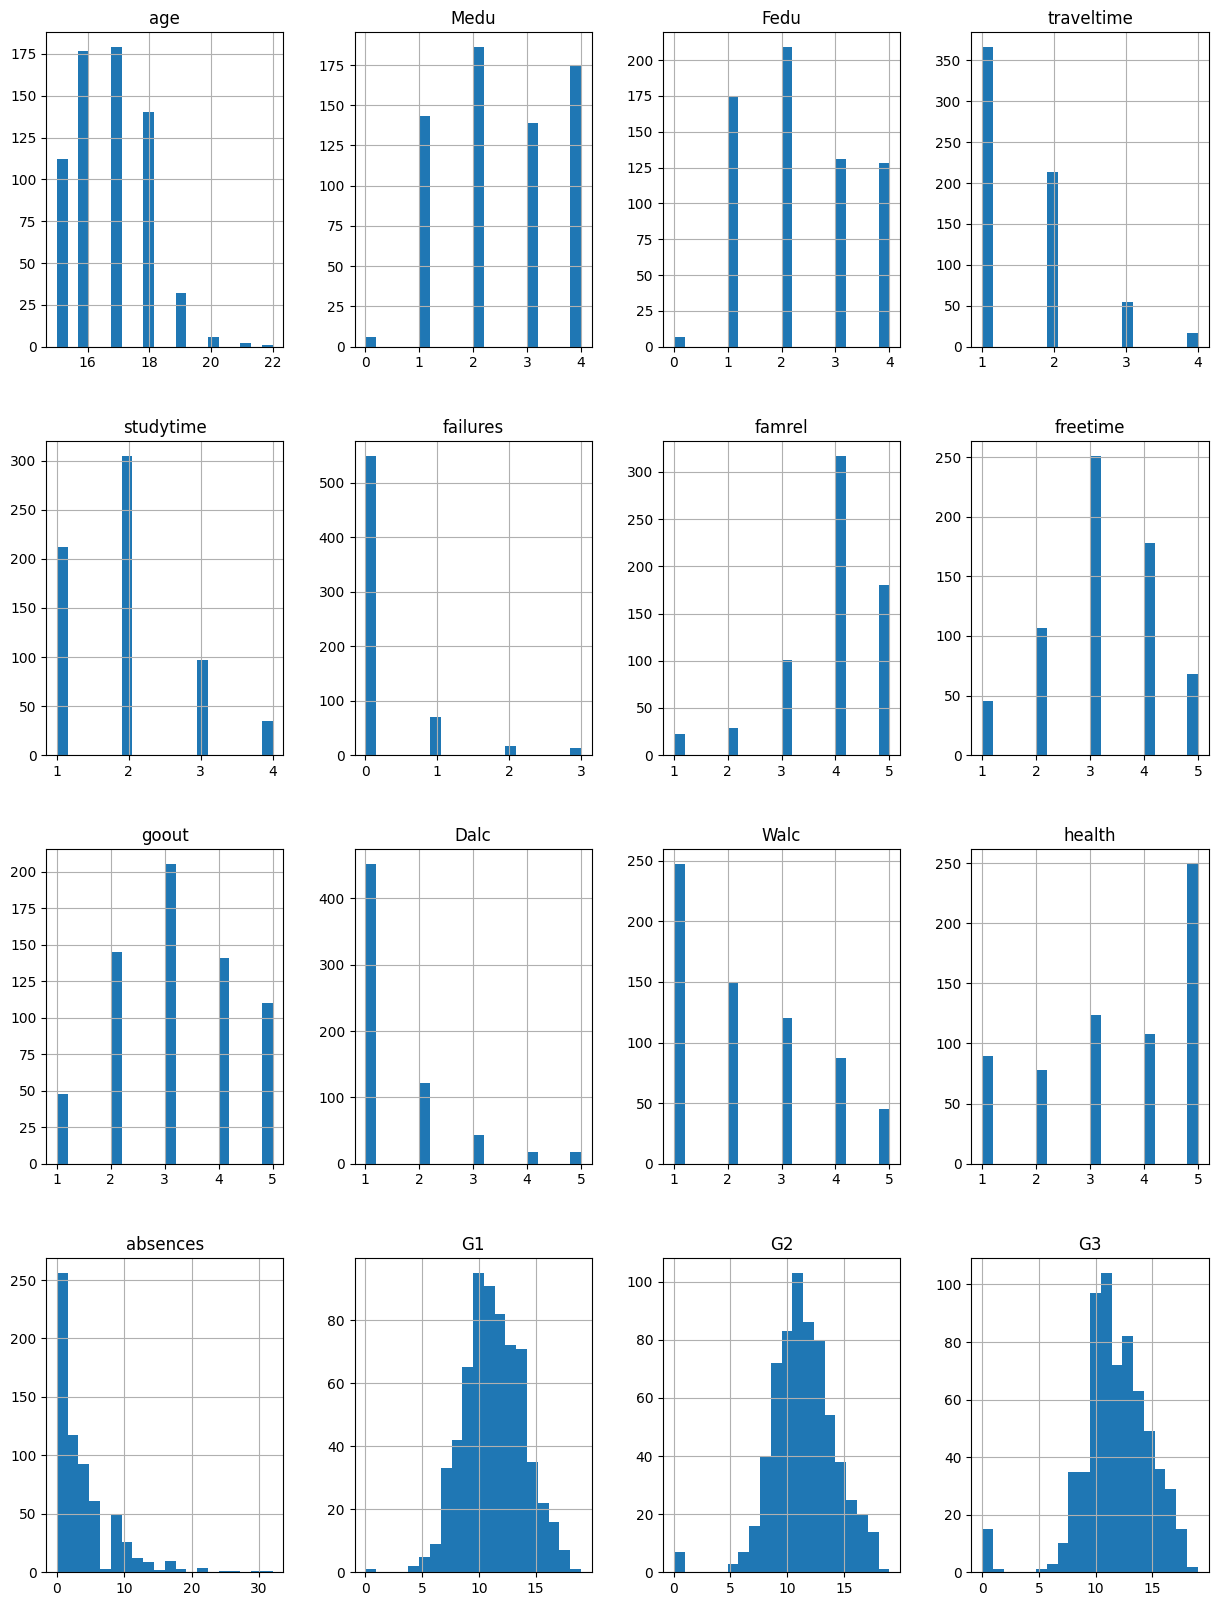

In [ ]:
data.hist(bins=20, figsize=(15, 20))
plt.show()

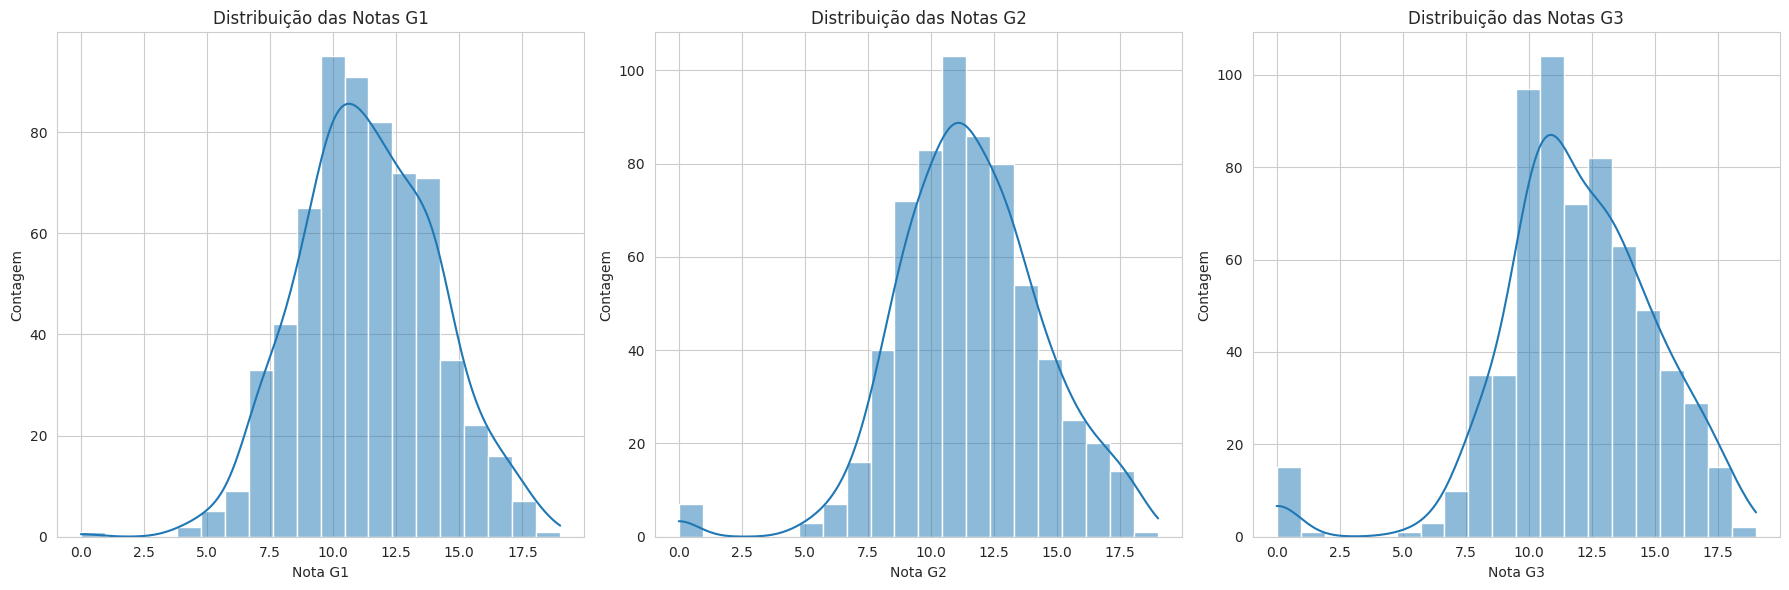

In [ ]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plot the distribution of grades
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.histplot(data['G1'].astype(int), ax=axes[0], kde=True, bins=20)
axes[0].set_title('Distribuição das Notas G1')
axes[0].set_xlabel('Nota G1')
axes[0].set_ylabel('Contagem')

sns.histplot(data['G2'].astype(int), ax=axes[1], kde=True, bins=20)
axes[1].set_title('Distribuição das Notas G2')
axes[1].set_xlabel('Nota G2')
axes[1].set_ylabel('Contagem')

sns.histplot(data['G3'].astype(int), ax=axes[2], kde=True, bins=20)
axes[2].set_title('Distribuição das Notas G3')
axes[2].set_xlabel('Nota G3')
axes[2].set_ylabel('Contagem')

plt.tight_layout()
plt.show()

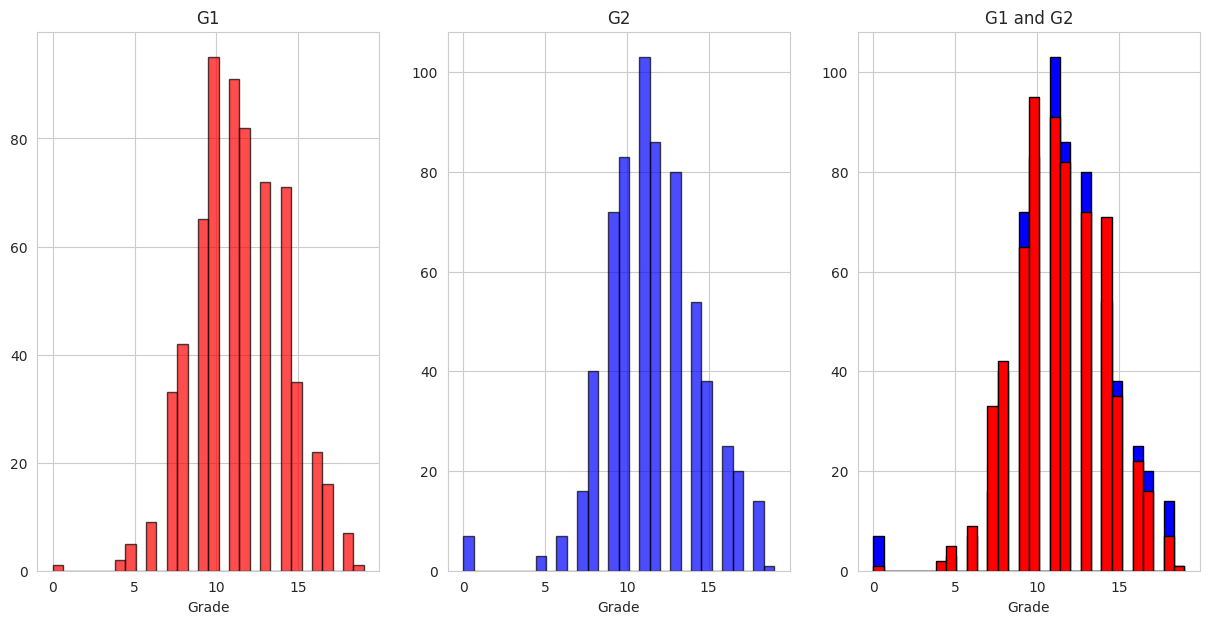

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))

# Plotting data on each subplot
axes[0].hist(data['G1'],  bins=30, color='red', edgecolor='black', alpha=0.7)
axes[0].set_title('G1')
axes[0].set_xlabel('Grade')
axes[0].grid(True)

axes[1].hist(data['G2'],  bins=30, color='blue', edgecolor='black', alpha=0.7)
axes[1].set_title('G2')
axes[1].set_xlabel('Grade')
axes[1].grid(True)

axes[2].hist(data['G2'],  bins=30, color='blue', edgecolor='black', alpha=1)
axes[2].hist(data['G1'],  bins=30, color='red', edgecolor='black', alpha=1)
axes[2].set_title('G1 and G2')
axes[2].set_xlabel('Grade')
axes[2].grid(True)

In [ ]:
data['Average Grades'] = data[['G1', 'G2', 'G3']].mean(axis='columns')

bins = pd.IntervalIndex.from_tuples([(0, 9.5), (9.5, 11.5), (11.5, 13.5), (13.5, 15.5), (15.5, 20)], closed='right')
levels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']
new_column = 'Average Grades Evaluation'
data[new_column] = np.array(levels)[pd.cut(data['Average Grades'], bins=bins).cat.codes]

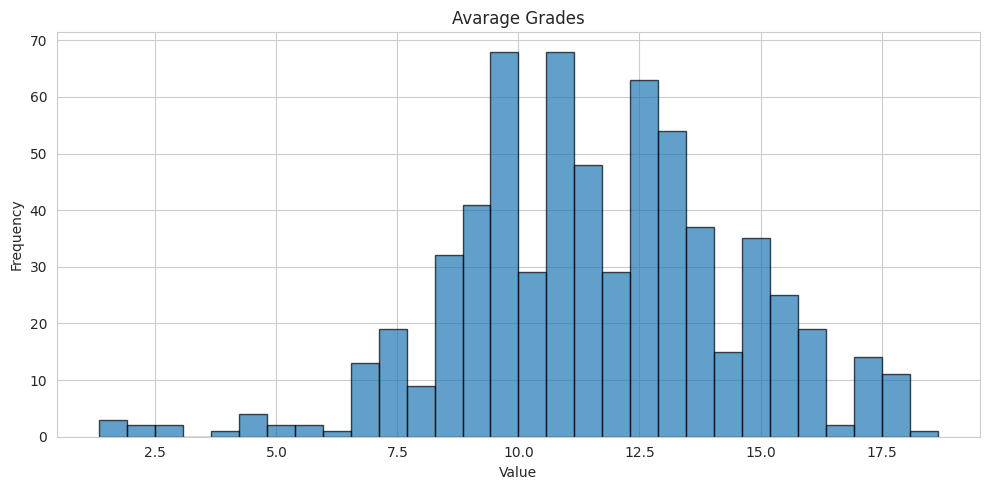

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(data['Average Grades'], bins=30, edgecolor='black', alpha=0.7)

# Add a title and labels
plt.title('Avarage Grades')
plt.xlabel('Value')
plt.ylabel('Frequency')
# Show the plot
plt.grid(True)
plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [ ]:
from IPython.display import Image
Image(url='https://i.imgur.com/LULMfa5.png')

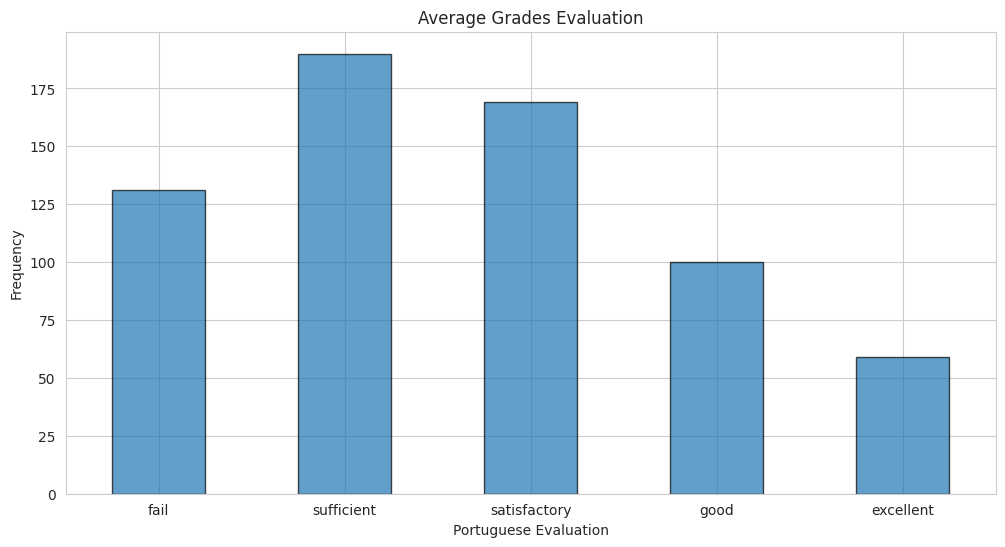

In [ ]:
order = ['fail','sufficient', 'satisfactory','good','excellent']
ax = data['Average Grades Evaluation'].value_counts(sort=False).loc[order].plot.bar(
    rot=0,
    edgecolor='black',
    width=0.5,
    alpha = 0.7,
    figsize=(12, 6)
    )

# Adding a grid
ax.grid(True)
ax.set_title('Average Grades Evaluation')
ax.set_xlabel('Portuguese Evaluation')
ax.set_ylabel('Frequency')
# Show the plot
plt.show()

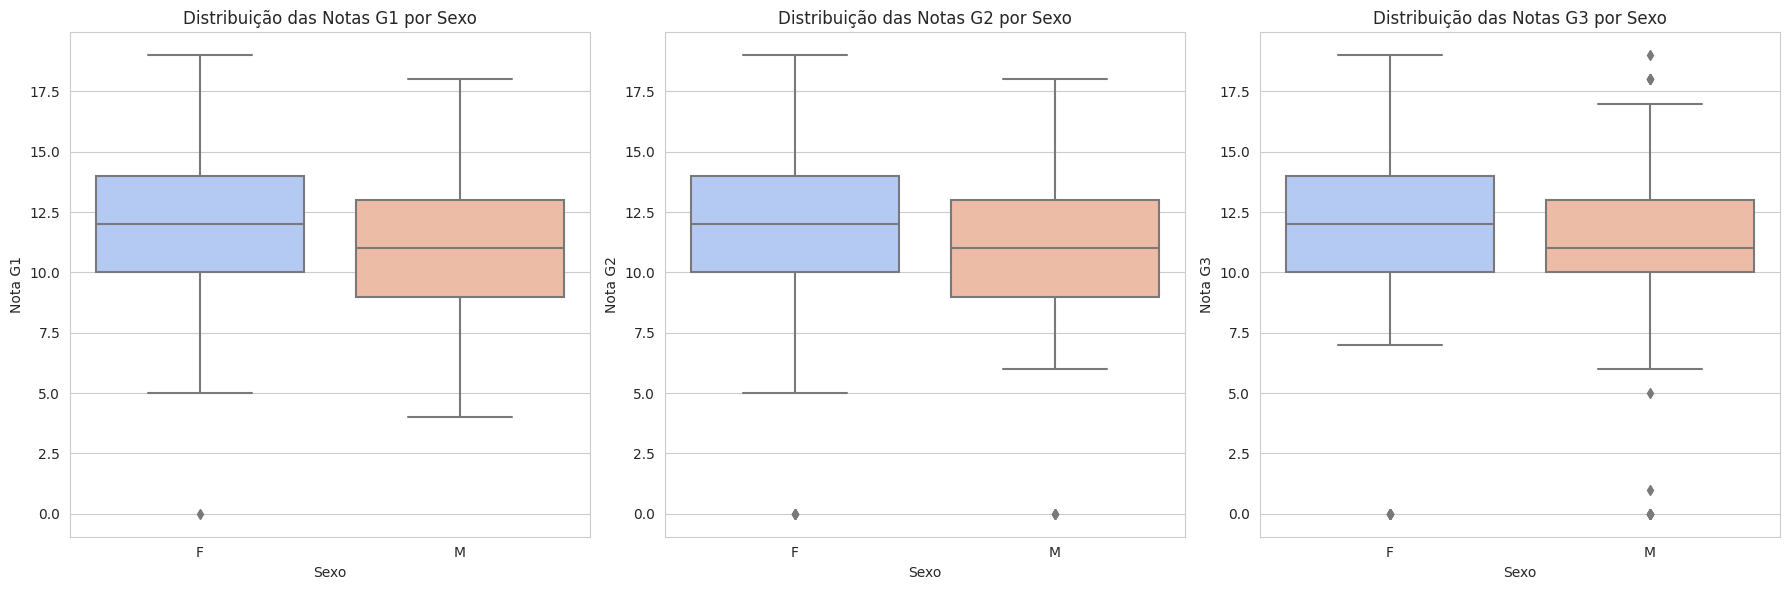

In [ ]:
# Plot the distribution of grades based on gender
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x=data['sex'], y=data['G1'], ax=axes[0], palette="coolwarm")
axes[0].set_title('Distribuição das Notas G1 por Sexo')
axes[0].set_xlabel('Sexo')
axes[0].set_ylabel('Nota G1')

sns.boxplot(x=data['sex'], y=data['G2'], ax=axes[1], palette="coolwarm")
axes[1].set_title('Distribuição das Notas G2 por Sexo')
axes[1].set_xlabel('Sexo')
axes[1].set_ylabel('Nota G2')

sns.boxplot(x=data['sex'], y=data['G3'], ax=axes[2], palette="coolwarm")
axes[2].set_title('Distribuição das Notas G3 por Sexo')
axes[2].set_xlabel('Sexo')
axes[2].set_ylabel('Nota G3')

plt.tight_layout()
plt.show()

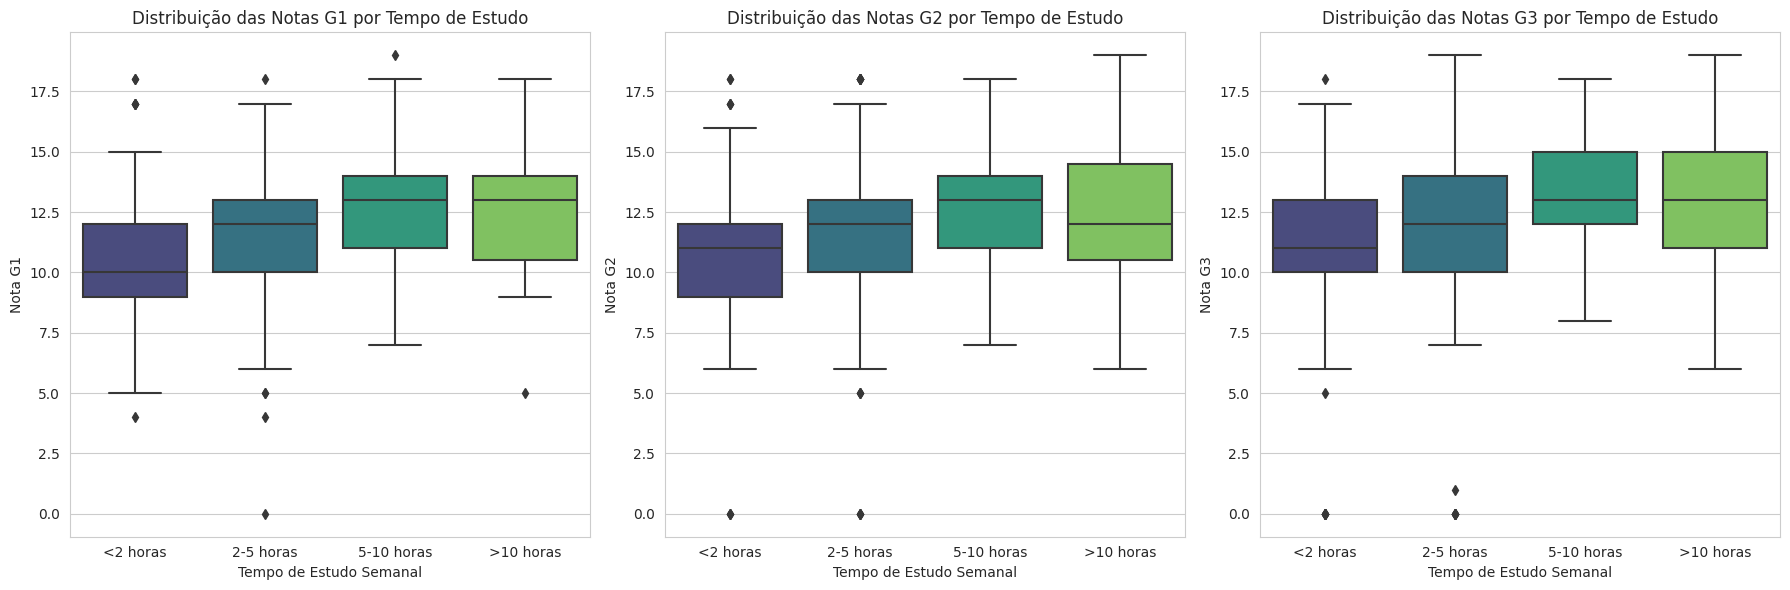

In [ ]:
# Plot the distribution of grades based on study time
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x=data['studytime'], y=data['G1'], ax=axes[0], palette="viridis")
axes[0].set_title('Distribuição das Notas G1 por Tempo de Estudo')
axes[0].set_xlabel('Tempo de Estudo Semanal')
axes[0].set_ylabel('Nota G1')
axes[0].set_xticklabels(['<2 horas', '2-5 horas', '5-10 horas', '>10 horas'])

sns.boxplot(x=data['studytime'], y=data['G2'], ax=axes[1], palette="viridis")
axes[1].set_title('Distribuição das Notas G2 por Tempo de Estudo')
axes[1].set_xlabel('Tempo de Estudo Semanal')
axes[1].set_ylabel('Nota G2')
axes[1].set_xticklabels(['<2 horas', '2-5 horas', '5-10 horas', '>10 horas'])

sns.boxplot(x=data['studytime'], y=data['G3'], ax=axes[2], palette="viridis")
axes[2].set_title('Distribuição das Notas G3 por Tempo de Estudo')
axes[2].set_xlabel('Tempo de Estudo Semanal')
axes[2].set_ylabel('Nota G3')
axes[2].set_xticklabels(['<2 horas', '2-5 horas', '5-10 horas', '>10 horas'])

plt.tight_layout()
plt.show()


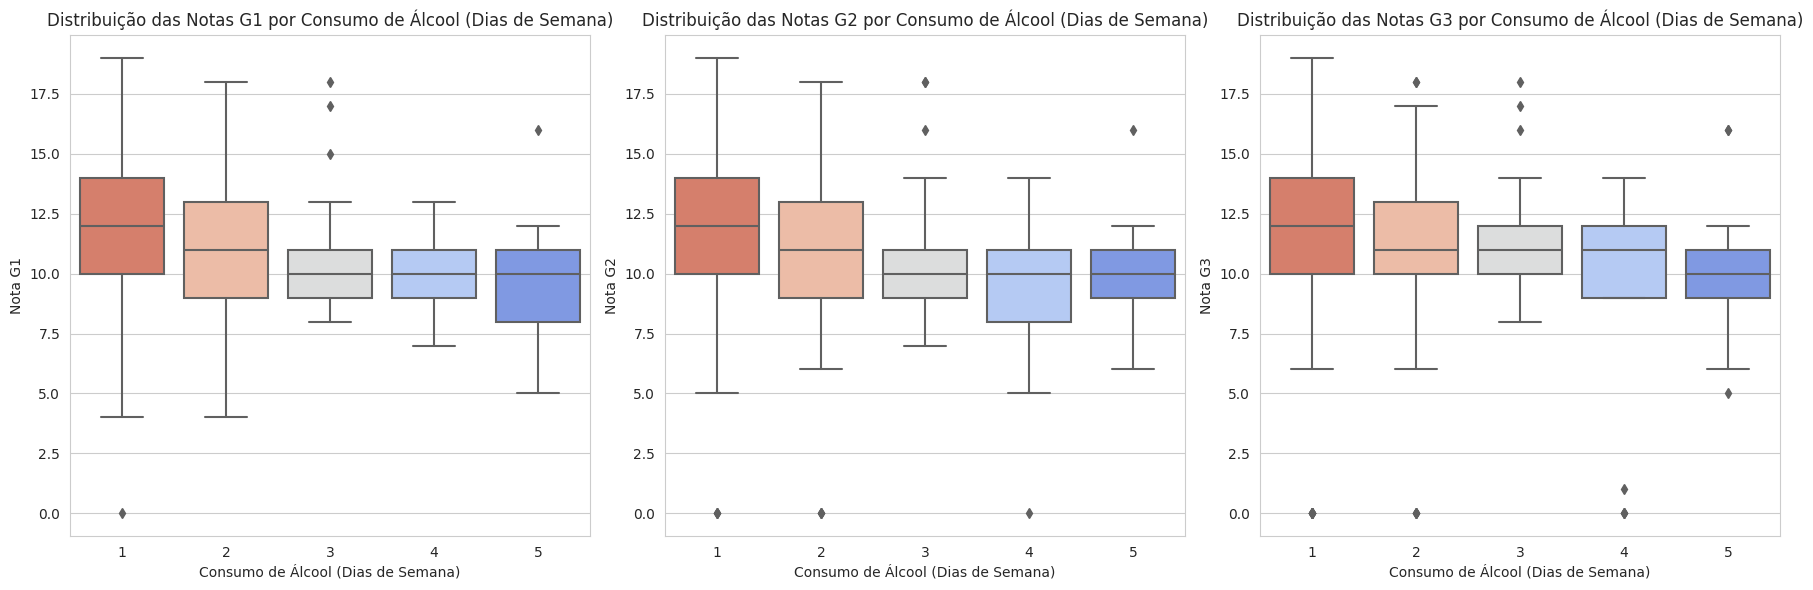

In [ ]:
# Plot the distribution of grades based on weekday alcohol consumption
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x=data['Dalc'], y=data['G1'], ax=axes[0], palette="coolwarm_r")
axes[0].set_title('Distribuição das Notas G1 por Consumo de Álcool (Dias de Semana)')
axes[0].set_xlabel('Consumo de Álcool (Dias de Semana)')
axes[0].set_ylabel('Nota G1')

sns.boxplot(x=data['Dalc'], y=data['G2'], ax=axes[1], palette="coolwarm_r")
axes[1].set_title('Distribuição das Notas G2 por Consumo de Álcool (Dias de Semana)')
axes[1].set_xlabel('Consumo de Álcool (Dias de Semana)')
axes[1].set_ylabel('Nota G2')

sns.boxplot(x=data['Dalc'], y=data['G3'], ax=axes[2], palette="coolwarm_r")
axes[2].set_title('Distribuição das Notas G3 por Consumo de Álcool (Dias de Semana)')
axes[2].set_xlabel('Consumo de Álcool (Dias de Semana)')
axes[2].set_ylabel('Nota G3')

plt.tight_layout()
plt.show()


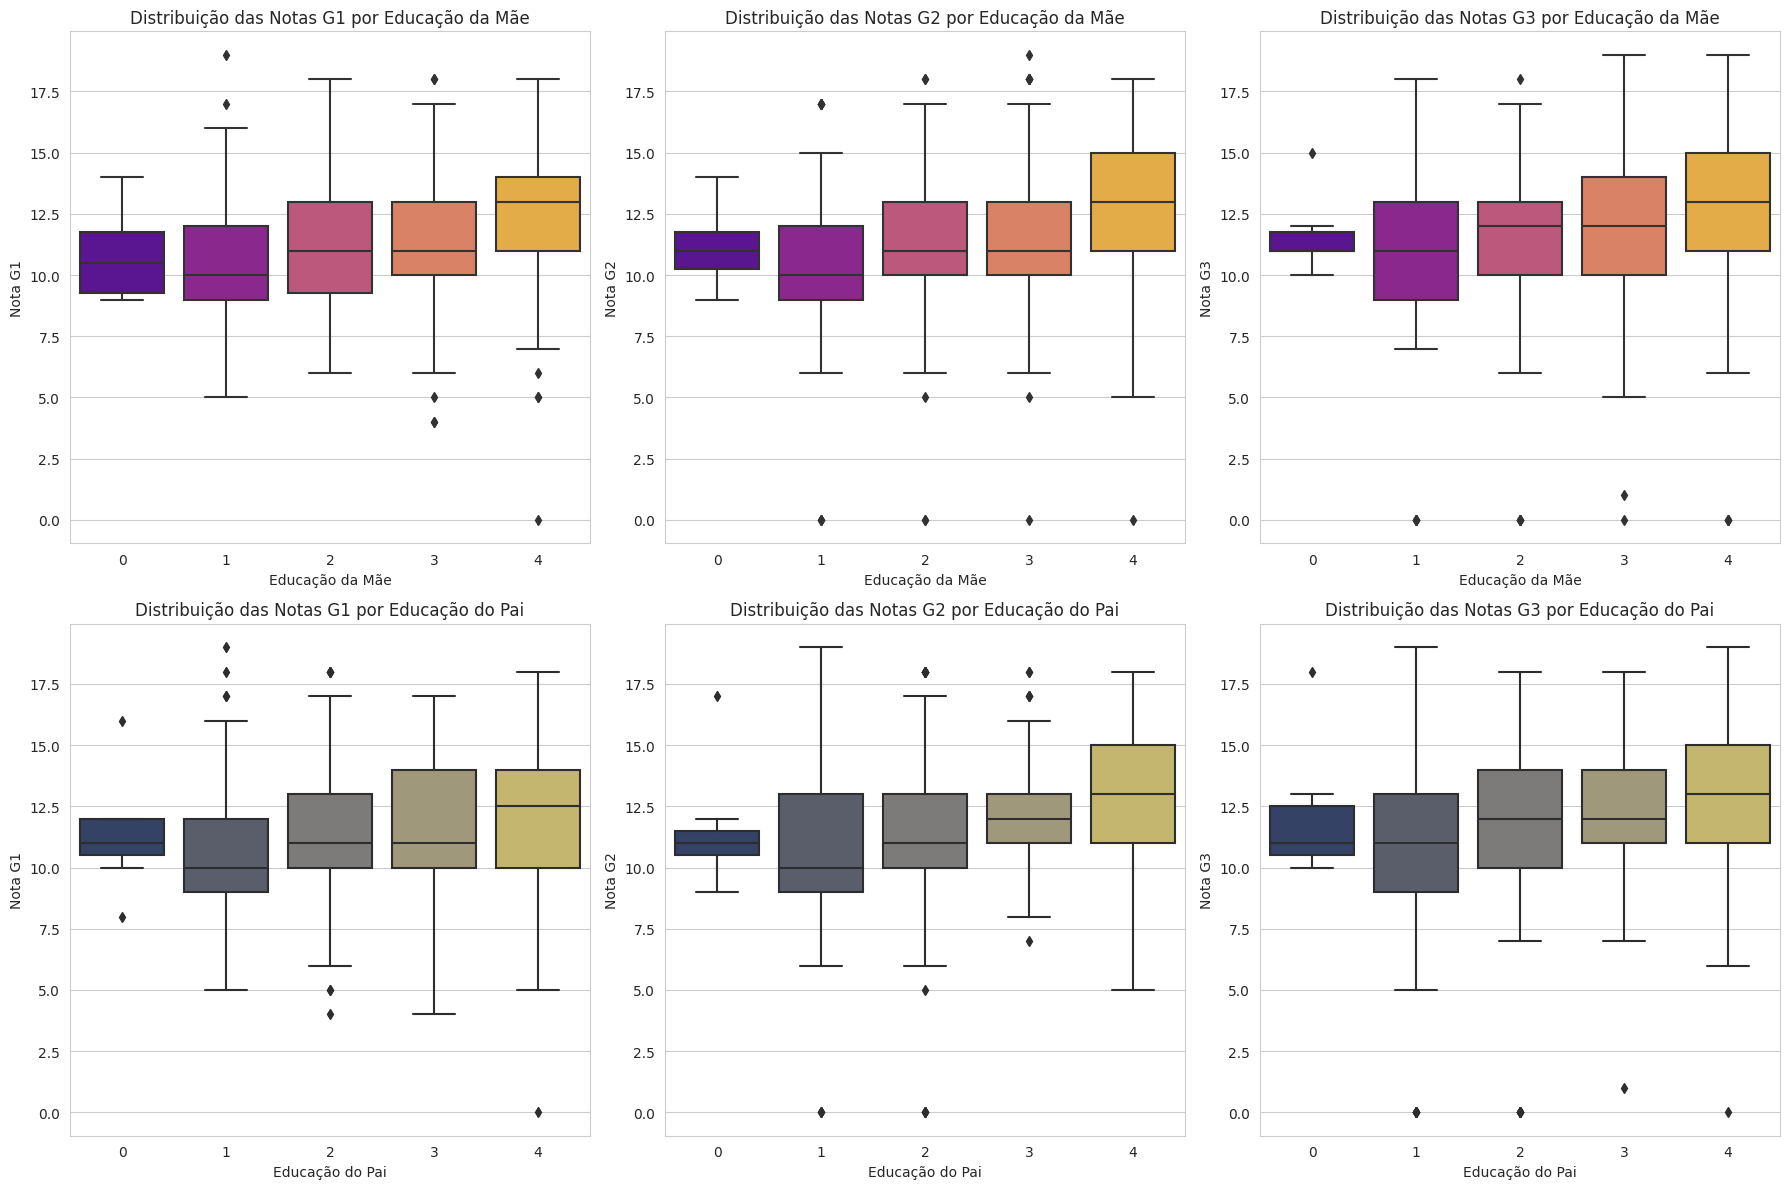

In [ ]:
# Plot the distribution of grades based on parents' education level
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Mother's Education
sns.boxplot(x=data['Medu'], y=data['G1'], ax=axes[0, 0], palette="plasma")
axes[0, 0].set_title('Distribuição das Notas G1 por Educação da Mãe')
axes[0, 0].set_xlabel('Educação da Mãe')
axes[0, 0].set_ylabel('Nota G1')

sns.boxplot(x=data['Medu'], y=data['G2'], ax=axes[0, 1], palette="plasma")
axes[0, 1].set_title('Distribuição das Notas G2 por Educação da Mãe')
axes[0, 1].set_xlabel('Educação da Mãe')
axes[0, 1].set_ylabel('Nota G2')

sns.boxplot(x=data['Medu'], y=data['G3'], ax=axes[0, 2], palette="plasma")
axes[0, 2].set_title('Distribuição das Notas G3 por Educação da Mãe')
axes[0, 2].set_xlabel('Educação da Mãe')
axes[0, 2].set_ylabel('Nota G3')

# Father's Education
sns.boxplot(x=data['Fedu'], y=data['G1'], ax=axes[1, 0], palette="cividis")
axes[1, 0].set_title('Distribuição das Notas G1 por Educação do Pai')
axes[1, 0].set_xlabel('Educação do Pai')
axes[1, 0].set_ylabel('Nota G1')

sns.boxplot(x=data['Fedu'], y=data['G2'], ax=axes[1, 1], palette="cividis")
axes[1, 1].set_title('Distribuição das Notas G2 por Educação do Pai')
axes[1, 1].set_xlabel('Educação do Pai')
axes[1, 1].set_ylabel('Nota G2')

sns.boxplot(x=data['Fedu'], y=data['G3'], ax=axes[1, 2], palette="cividis")
axes[1, 2].set_title('Distribuição das Notas G3 por Educação do Pai')
axes[1, 2].set_xlabel('Educação do Pai')
axes[1, 2].set_ylabel('Nota G3')

plt.tight_layout()
plt.show()


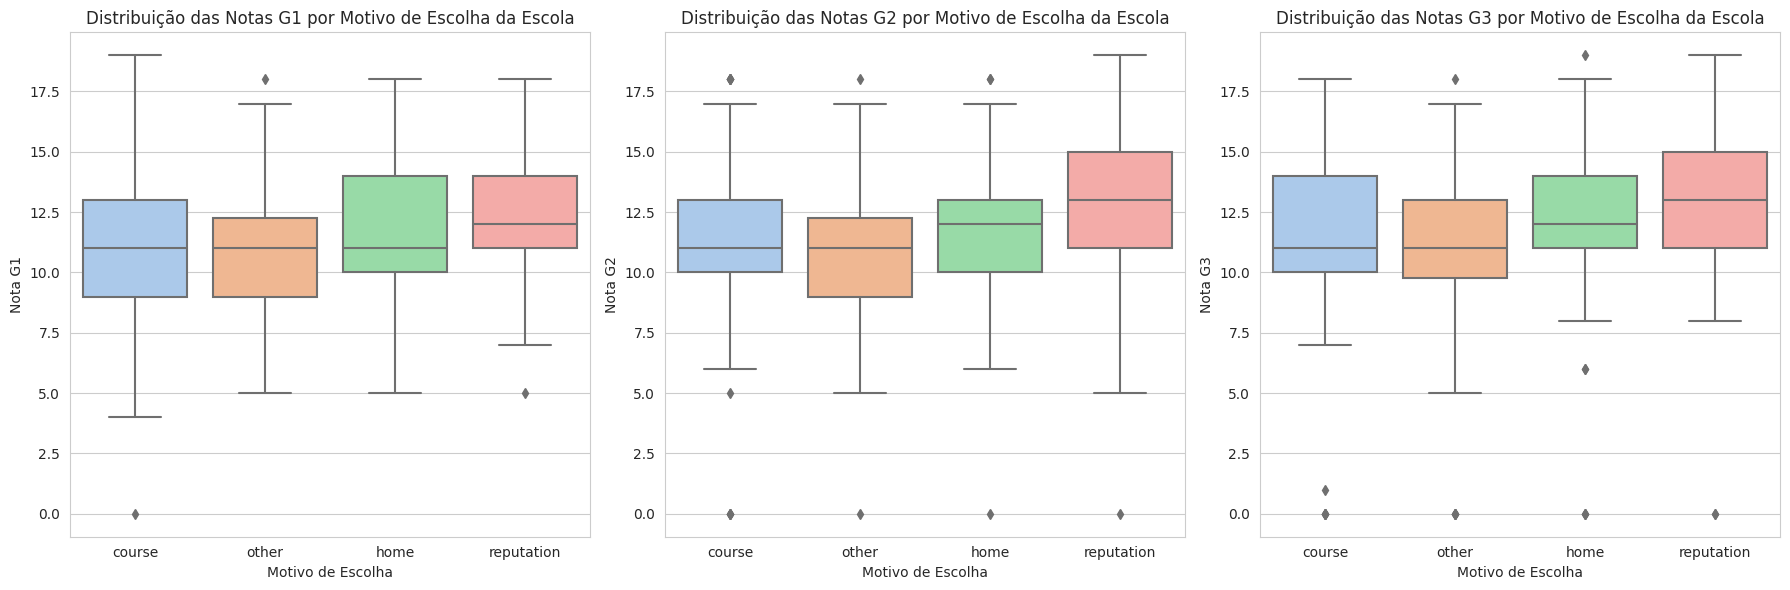

In [ ]:
# Plot the distribution of grades based on the reason for choosing the school
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x=data['reason'], y=data['G1'], ax=axes[0], palette="pastel")
axes[0].set_title('Distribuição das Notas G1 por Motivo de Escolha da Escola')
axes[0].set_xlabel('Motivo de Escolha')
axes[0].set_ylabel('Nota G1')

sns.boxplot(x=data['reason'], y=data['G2'], ax=axes[1], palette="pastel")
axes[1].set_title('Distribuição das Notas G2 por Motivo de Escolha da Escola')
axes[1].set_xlabel('Motivo de Escolha')
axes[1].set_ylabel('Nota G2')

sns.boxplot(x=data['reason'], y=data['G3'], ax=axes[2], palette="pastel")
axes[2].set_title('Distribuição das Notas G3 por Motivo de Escolha da Escola')
axes[2].set_xlabel('Motivo de Escolha')
axes[2].set_ylabel('Nota G3')

plt.tight_layout()
plt.show()


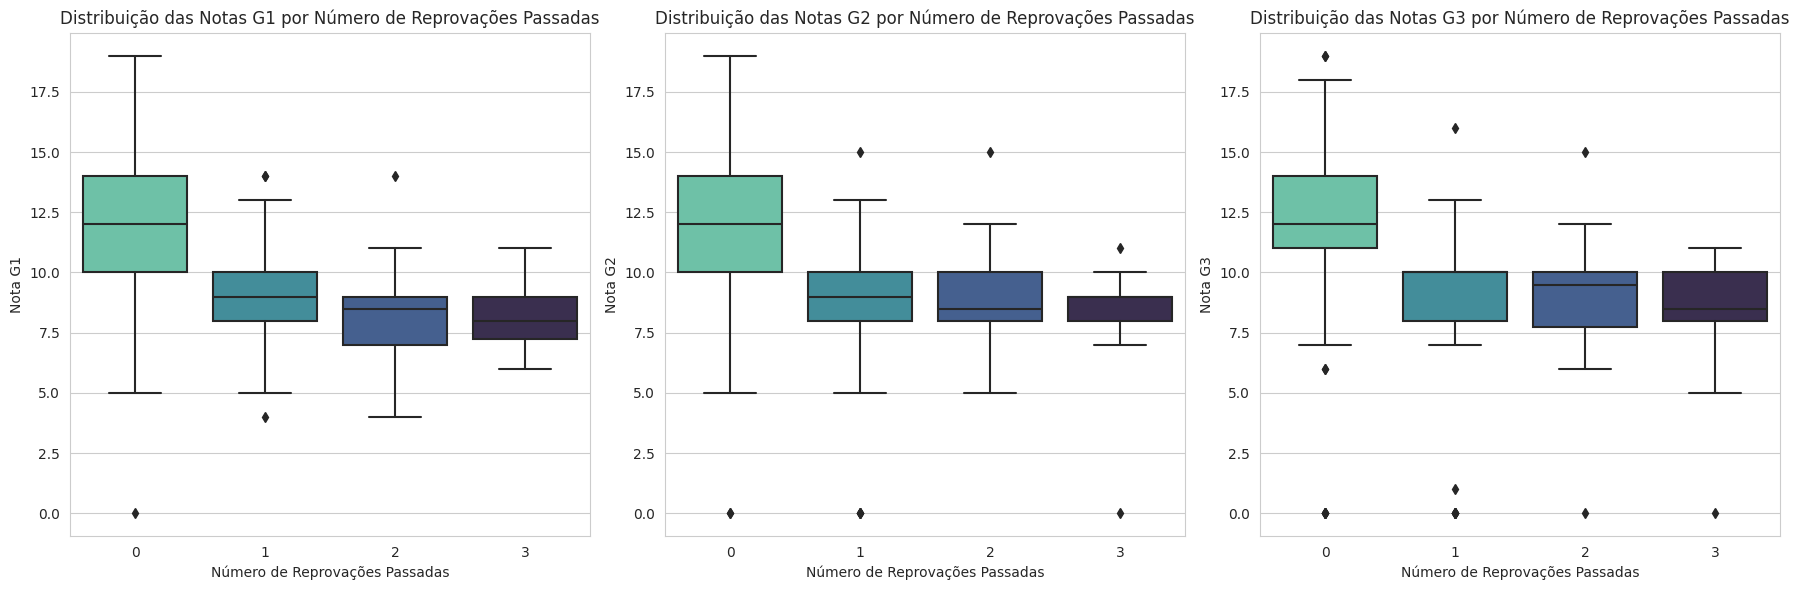

In [ ]:
# Plot the distribution of grades based on past failures
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

sns.boxplot(x=data['failures'], y=data['G1'], ax=axes[0], palette="mako_r")
axes[0].set_title('Distribuição das Notas G1 por Número de Reprovações Passadas')
axes[0].set_xlabel('Número de Reprovações Passadas')
axes[0].set_ylabel('Nota G1')

sns.boxplot(x=data['failures'], y=data['G2'], ax=axes[1], palette="mako_r")
axes[1].set_title('Distribuição das Notas G2 por Número de Reprovações Passadas')
axes[1].set_xlabel('Número de Reprovações Passadas')
axes[1].set_ylabel('Nota G2')

sns.boxplot(x=data['failures'], y=data['G3'], ax=axes[2], palette="mako_r")
axes[2].set_title('Distribuição das Notas G3 por Número de Reprovações Passadas')
axes[2].set_xlabel('Número de Reprovações Passadas')
axes[2].set_ylabel('Nota G3')

plt.tight_layout()
plt.show()


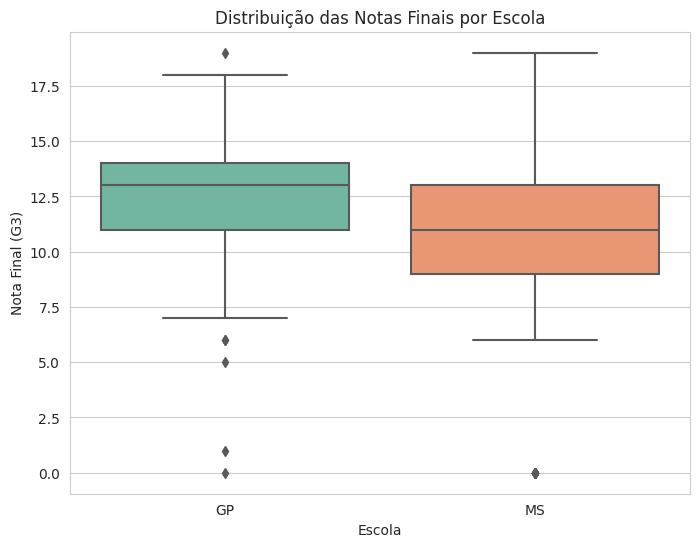

In [ ]:
# Plot the distribution of final grades based on school
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['school'], y=data['G3'], palette="Set2")
plt.title('Distribuição das Notas Finais por Escola')
plt.xlabel('Escola')
plt.ylabel('Nota Final (G3)')
plt.show()

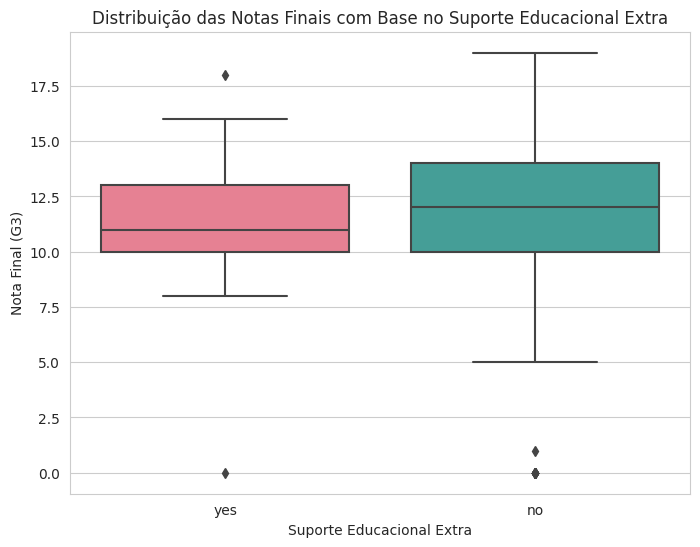

In [ ]:
# Plot the distribution of final grades based on extra educational support
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['schoolsup'], y=data['G3'], palette="husl")
plt.title('Distribuição das Notas Finais com Base no Suporte Educacional Extra')
plt.xlabel('Suporte Educacional Extra')
plt.ylabel('Nota Final (G3)')
plt.show()


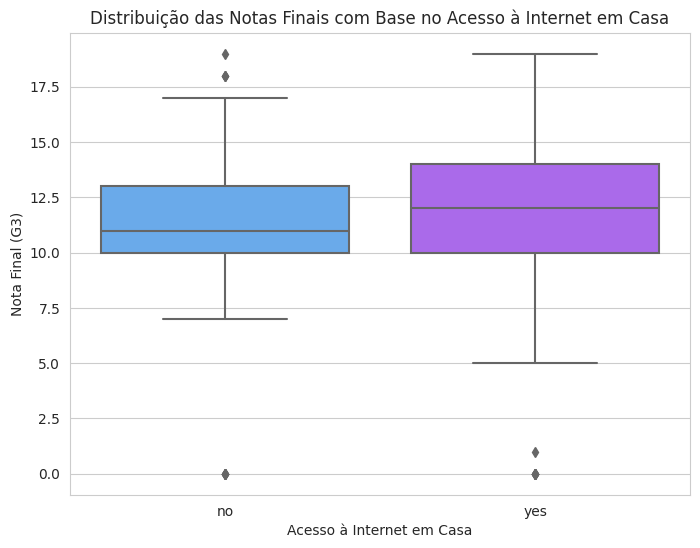

In [ ]:
# Plot the distribution of final grades based on internet access at home
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['internet'], y=data['G3'], palette="cool")
plt.title('Distribuição das Notas Finais com Base no Acesso à Internet em Casa')
plt.xlabel('Acesso à Internet em Casa')
plt.ylabel('Nota Final (G3)')
plt.show()


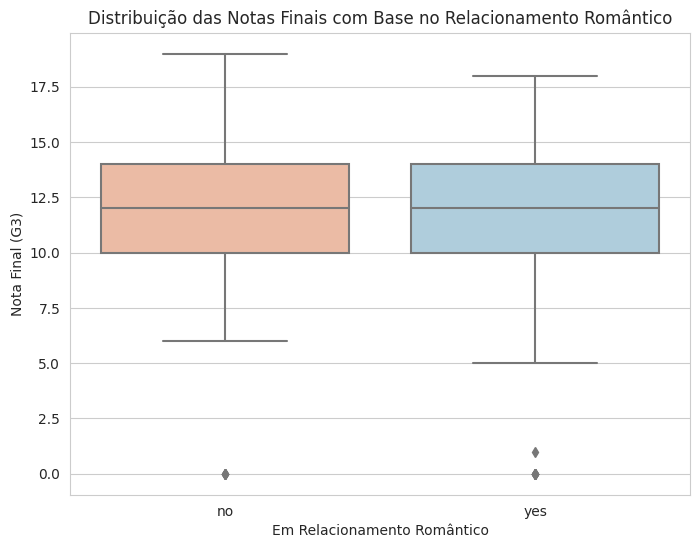

In [ ]:
# Plot the distribution of final grades based on romantic relationship status
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['romantic'], y=data['G3'], palette="RdBu")
plt.title('Distribuição das Notas Finais com Base no Relacionamento Romântico')
plt.xlabel('Em Relacionamento Romântico')
plt.ylabel('Nota Final (G3)')
plt.show()


# Correlação

<ipython-input-22-72af5db0daa4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cbar=False)


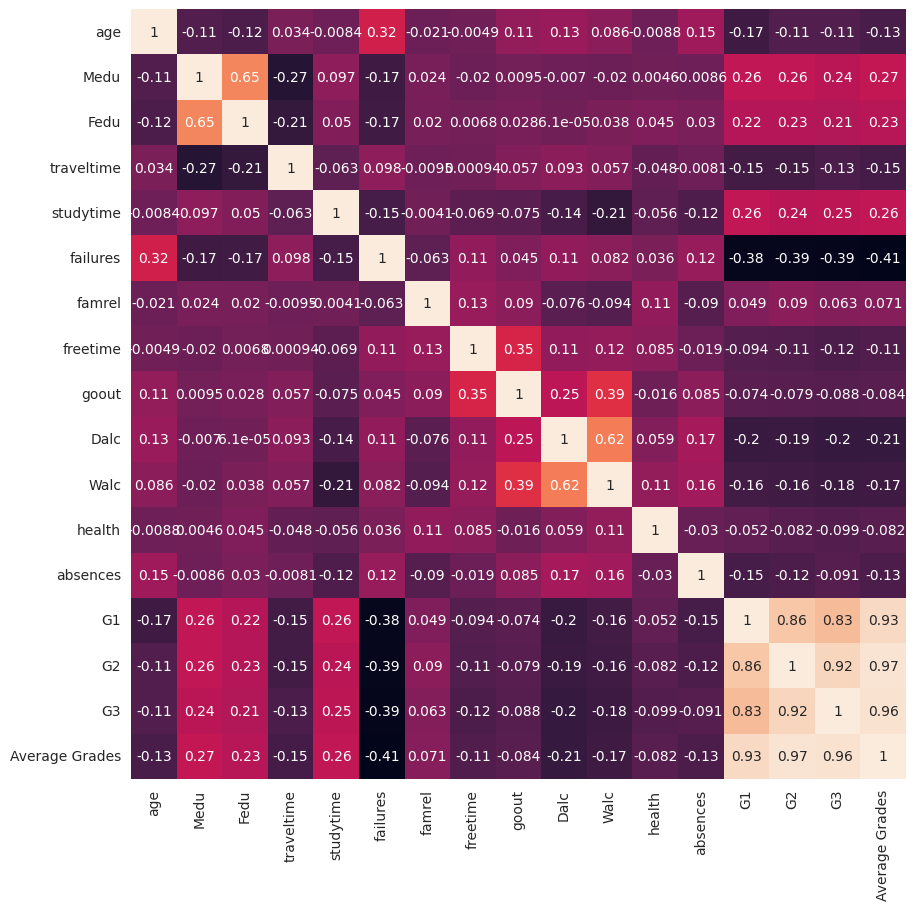

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cbar=False)
plt.show()

<ipython-input-23-8cda8d3e320c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


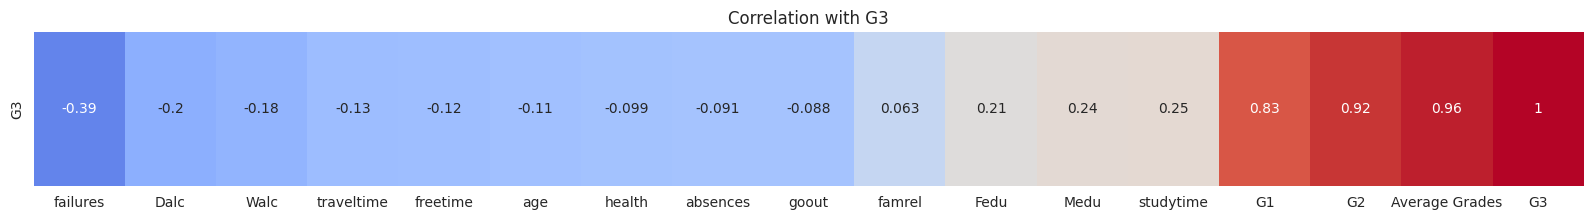

In [ ]:
corr_matrix = data.corr()

# Extract the row corresponding to 'Target_Column'
target_corr = corr_matrix.loc[['G3']]
sorted_columns = target_corr.columns[target_corr.values.argsort()[0]]
target_corr = target_corr[sorted_columns]
vmax_val = target_corr.abs().max(axis=1).values[0]
# Create the heatmap
plt.figure(figsize=(20, 2))  # Adjust the figure size for a horizontal heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=False,  vmin=-.6, vmax=1)
plt.title("Correlation with G3")
plt.show()

In [ ]:
data[['school','sex','address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]

school sex address famsize Pstatus schoolsup famsup paid activities  \
0       GP   F       U     GT3       A       yes     no   no         no   
1       GP   F       U     GT3       T        no    yes   no         no   
2       GP   F       U     LE3       T       yes     no   no         no   
3       GP   F       U     GT3       T        no    yes   no        yes   
4       GP   F       U     GT3       T        no    yes   no         no   
..     ...  ..     ...     ...     ...       ...    ...  ...        ...   
644     MS   F       R     GT3       T        no     no   no        yes   
645     MS   F       U     LE3       T        no    yes   no         no   
646     MS   F       U     GT3       T        no     no   no        yes   
647     MS   M       U     LE3       T        no     no   no         no   
648     MS   M       R     LE3       T        no     no   no         no   

    nursery higher internet romantic  
0       yes    yes       no       no  
1        no    yes      yes       no  
2       yes    yes      yes       no  
3       yes    yes      yes      yes  
4       yes    yes       no       no  
..      ...    ...      ...      ...  
644      no    yes      yes       no  
645     yes    yes      yes       no  
646     yes    yes       no       no  
647      no    yes      yes       no  
648      no    yes      yes       no  

[649 rows x 13 columns]

In [ ]:
binary_mappings = {
    "school": {"GP": 0, "MS": 1},
    "sex": {"F": 0, "M": 1},
    "address": {"U": 0, "R": 1},
    "famsize": {"LE3": 0, "GT3": 1},
    "Pstatus": {"T": 0, "A": 1},
    "schoolsup": {"no": 0, "yes": 1},
    "famsup": {"no": 0, "yes": 1},
    "paid": {"no": 0, "yes": 1},
    "activities": {"no": 0, "yes": 1},
    "nursery": {"no": 0, "yes": 1},
    "higher": {"no": 0, "yes": 1},
    "internet": {"no": 0, "yes": 1},
    "romantic": {"no": 0, "yes": 1}
}

data.replace(binary_mappings, inplace=True)

# One-hot encoding for nominal columns
nominal_columns = ["Mjob", "Fjob", "reason", "guardian"]
data = pd.get_dummies(data, columns=nominal_columns, drop_first=True)  # drop_first=True to avoid collinearity

<ipython-input-26-9ca46d37e348>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='coolwarm', annot=False, cbar=True)


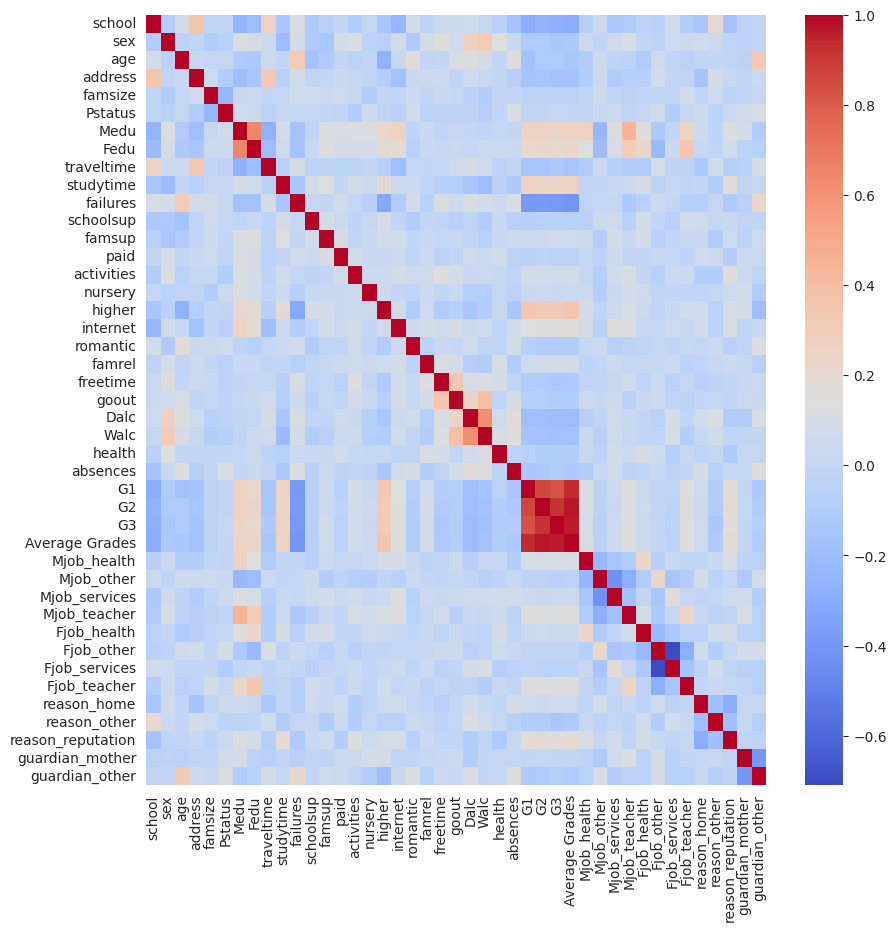

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, cbar=True)
plt.show()

<ipython-input-27-e919635c8938>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


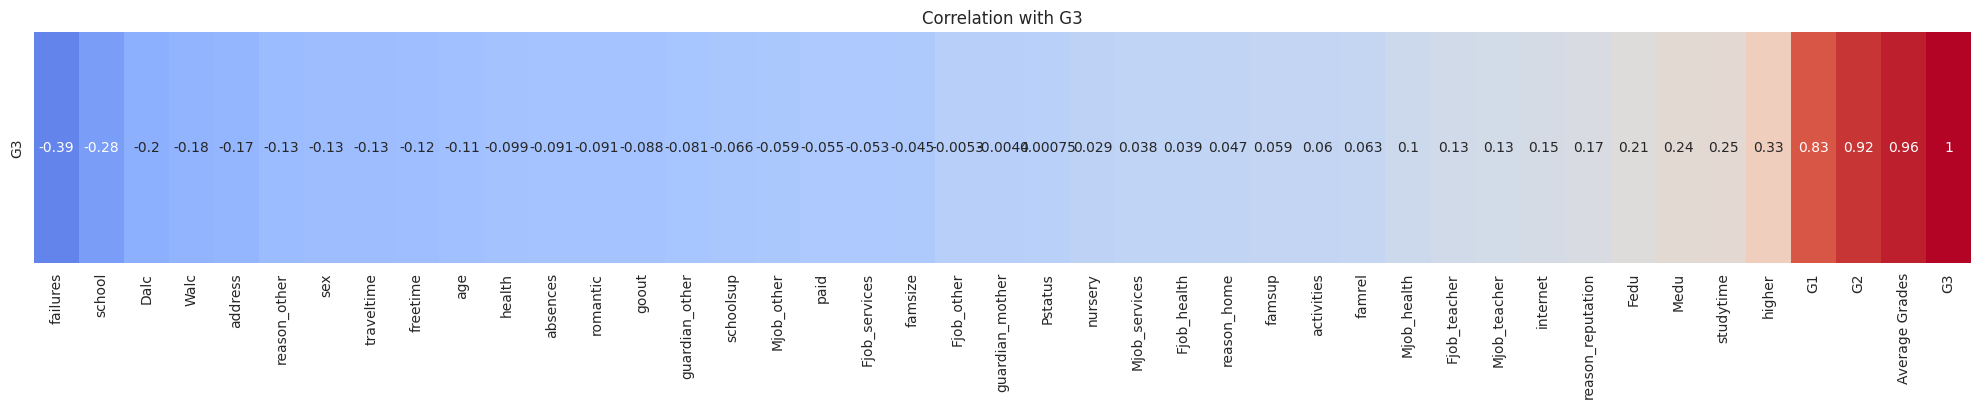

In [ ]:
corr_matrix = data.corr()

# Extract the row corresponding to 'Target_Column'
target_corr = corr_matrix.loc[['G3']]
sorted_columns = target_corr.columns[target_corr.values.argsort()[0]]
target_corr = target_corr[sorted_columns]
# Create the heatmap
plt.figure(figsize=(25, 3))  # Adjust the figure size for a horizontal heatmap
sns.heatmap(target_corr, annot=True, cmap='coolwarm', cbar=False,  vmin=-.6, vmax=1)
plt.title("Correlation with G3")
plt.show()

<ipython-input-28-c05a48e784e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


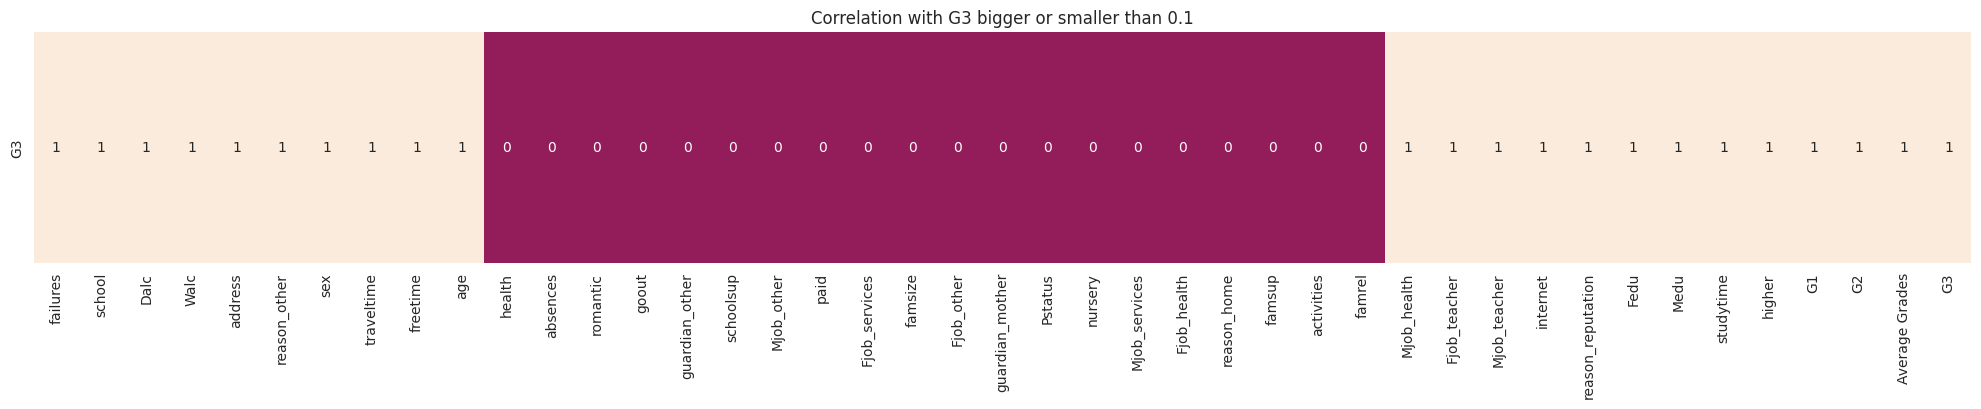

In [ ]:
corr_matrix = data.corr()

# Extract the row corresponding to 'Target_Column'
target_corr = corr_matrix.loc[['G3']]
sorted_columns = target_corr.columns[target_corr.values.argsort()[0]]
target_corr = target_corr[sorted_columns]
vmax_val = target_corr.abs().max(axis=1).values[0]
# Create the heatmap
plt.figure(figsize=(25, 3))  # Adjust the figure size for a horizontal heatmap
sns.heatmap(abs(target_corr)>0.1, annot=True, cbar=False,  vmin=-0.2, vmax=0.34)
plt.title("Correlation with G3 bigger or smaller than 0.1")
plt.show()

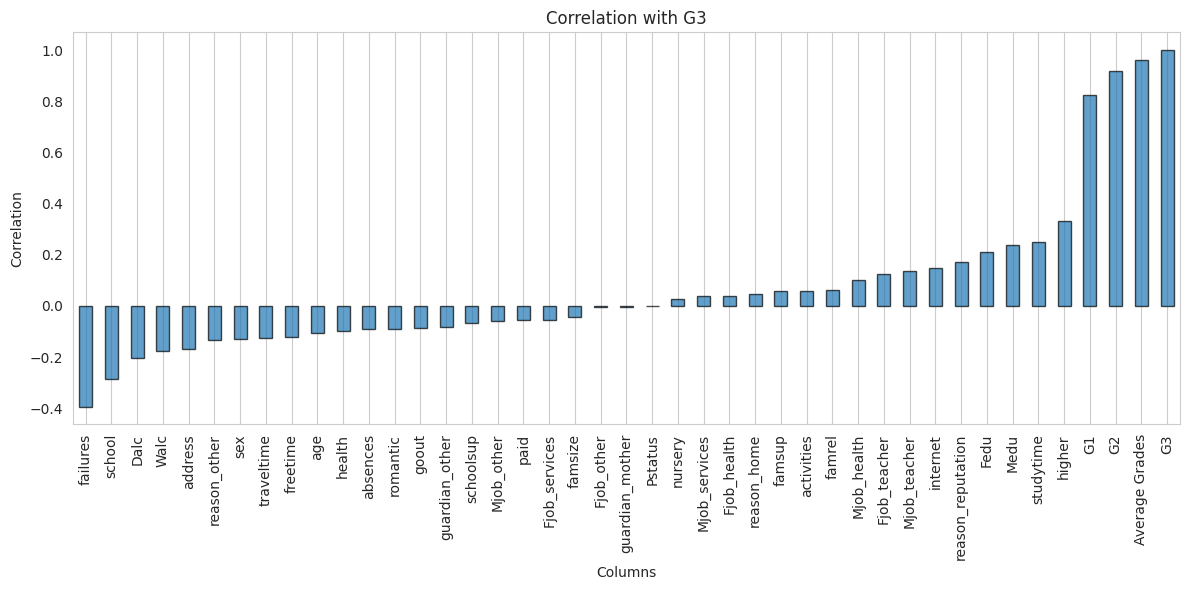

In [ ]:
row_data = target_corr.loc['G3']
plt.figure(figsize=(12, 6))
row_data.plot(kind='bar', edgecolor='black', alpha=0.7)
plt.title('Correlation with G3')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

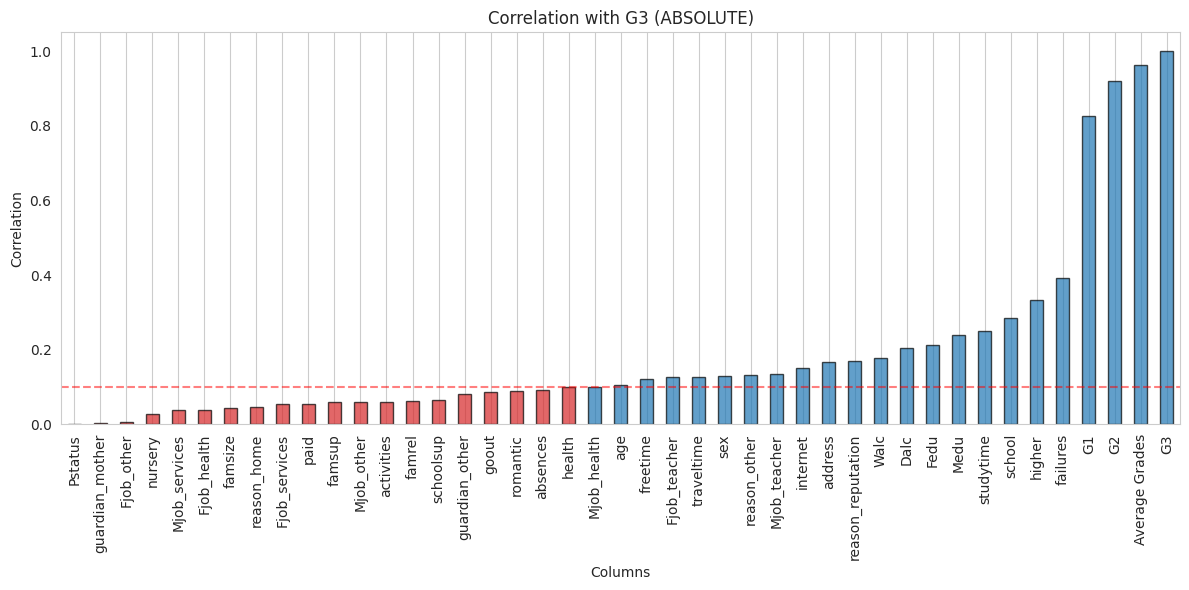

In [ ]:
row_data = target_corr.loc['G3'].abs().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
colors = ['#d62728' if value < 0.1 else '#1f77b4' for value in row_data]
ax = row_data.plot(kind='bar', edgecolor='black', alpha=0.7, color=colors)
ax.axhline(y=0.1, color='red', linestyle='--', alpha=0.5)
plt.title('Correlation with G3 (ABSOLUTE)')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

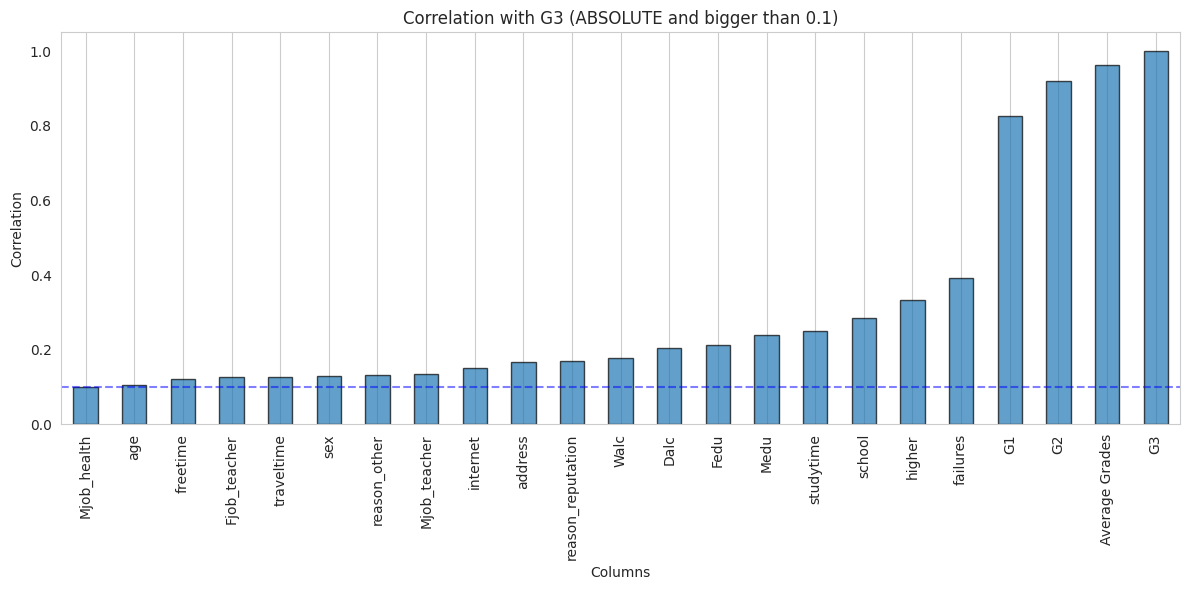

In [ ]:
filtered_cols = target_corr.columns[target_corr.loc['G3'].abs() > 0.1]
new_df = target_corr[filtered_cols].abs().T.sort_values(by='G3', ascending=True).T
plt.figure(figsize=(12, 6))
ax = new_df.loc['G3'].plot(kind='bar', edgecolor='black', alpha=0.7)
ax.axhline(y=0.1, color='blue', linestyle='--', alpha=0.5)
plt.title('Correlation with G3 (ABSOLUTE and bigger than 0.1)')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# PREDICT

## Linear

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import linear_model, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, learning_curve, cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [ ]:
df = data
df = df.sample(frac=1, random_state=5)
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']
target = 'G3'

x_train, x_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.3, random_state=0
)

In [ ]:
scoring = 'r2'
score = cross_val_score(linear_model.LinearRegression(), df[features], df[target], cv=10, scoring=scoring)
score.mean()

0.8415078374132771

In [ ]:
scaler = StandardScaler()

x_train = scaler.fit_transform(np.asanyarray(x_train))
y_train = np.asanyarray(y_train)

x_test = scaler.fit_transform(np.asanyarray(x_test))
y_test = np.asanyarray(y_test)

In [ ]:
model = linear_model.LinearRegression()
model = model.fit(x_train, y_train)

In [ ]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients: ", coefficients)
print("Intercept: ", model.intercept_)

Coefficients:  [-0.14586138 -0.02788703  0.04573769 -0.01366681  0.00942974  0.0469009
 -0.11364551  0.05811391  0.09203058  0.03898225 -0.06496589 -0.08888268
  0.00456543  0.00341211 -0.01266914 -0.03412928  0.11229832  0.05891664
 -0.01569988 -0.02185758 -0.04927885 -0.0740411   0.09691067 -0.02474509
 -0.03629562 -0.03233469  0.38912348  2.49122186  0.08256846  0.04511633
  0.10047423  0.00356454 -0.09159007 -0.18629077 -0.19575968 -0.0413369
 -0.03452274 -0.13272957 -0.04728527 -0.09147109 -0.0133546 ]
Intercept:  11.90308370044053


In [ ]:
y_test_pred = model.predict(x_test)

In [ ]:
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 1.6317276417171844
R2-score: 0.7763556624010644


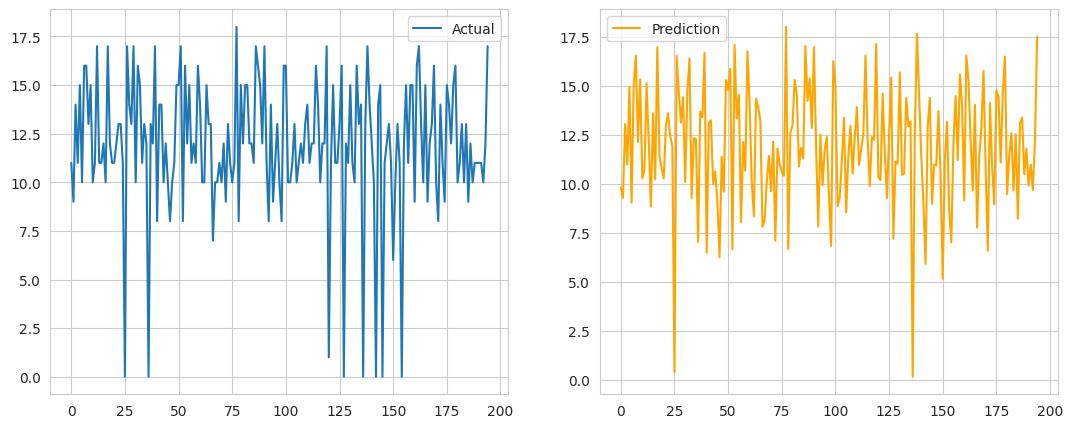

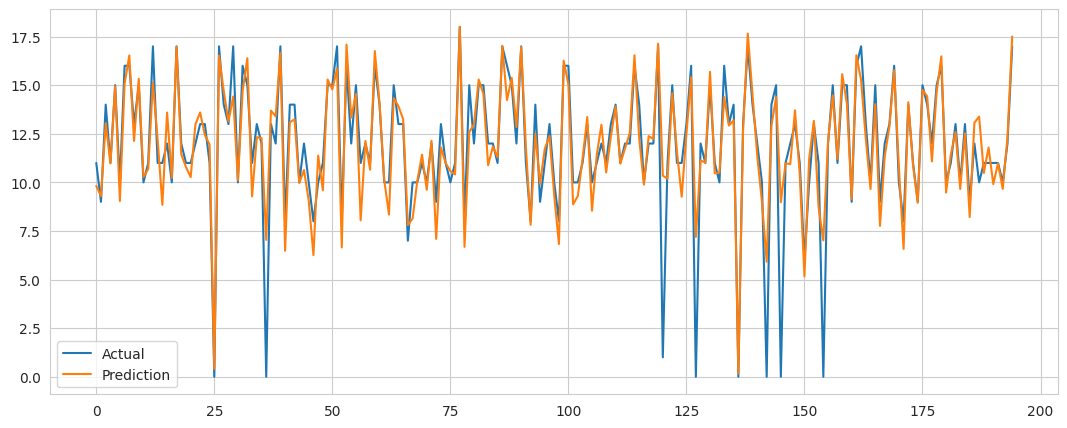

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, color='orange', label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

In [ ]:
def evaluate(columns):
    features = columns
    target = 'G3'

    x_train, x_test, y_train, y_test = train_test_split(
        df[features], df[target], test_size=0.3, random_state=0
    )
    scaler = StandardScaler()

    x_train = scaler.fit_transform(np.asanyarray(x_train))
    y_train = np.asanyarray(y_train)

    x_test = scaler.fit_transform(np.asanyarray(x_test))
    y_test = np.asanyarray(y_test)

    model = linear_model.LinearRegression()
    model = model.fit(x_train, y_train)

    coefficients = model.coef_
    intercept = model.intercept_

    print("Coefficients: ", coefficients)
    print("Intercept: ", model.intercept_)

    scoring = 'r2'
    score = cross_val_score(linear_model.LinearRegression(), x_train, y_train, cv=5, scoring=scoring)
    print(f"R2-score-cross-validation: {score.mean()}")

    y_test_pred = model.predict(x_test)

    rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
    r2_score_value = r2_score(y_test, y_test_pred)

    print(f"Root mean squared error: {rms_error}")
    print(f"R2-score: {r2_score_value}")

    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

    ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
    ax2.plot(np.arange(len(y_test_pred)), y_test_pred, color='orange', label='Prediction')

    ax1.legend()
    ax2.legend()

    f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

    ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
    ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

    ax3.legend()

Coefficients:  [-0.14586138 -0.02788703  0.04573769 -0.01366681  0.00942974  0.0469009
 -0.11364551  0.05811391  0.09203058  0.03898225 -0.06496589 -0.08888268
  0.00456543  0.00341211 -0.01266914 -0.03412928  0.11229832  0.05891664
 -0.01569988 -0.02185758 -0.04927885 -0.0740411   0.09691067 -0.02474509
 -0.03629562 -0.03233469  0.38912348  2.49122186  0.08256846  0.04511633
  0.10047423  0.00356454 -0.09159007 -0.18629077 -0.19575968 -0.0413369
 -0.03452274 -0.13272957 -0.04728527 -0.09147109 -0.0133546 ]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.8664678408200933
Root mean squared error: 1.6317276417171844
R2-score: 0.7763556624010644


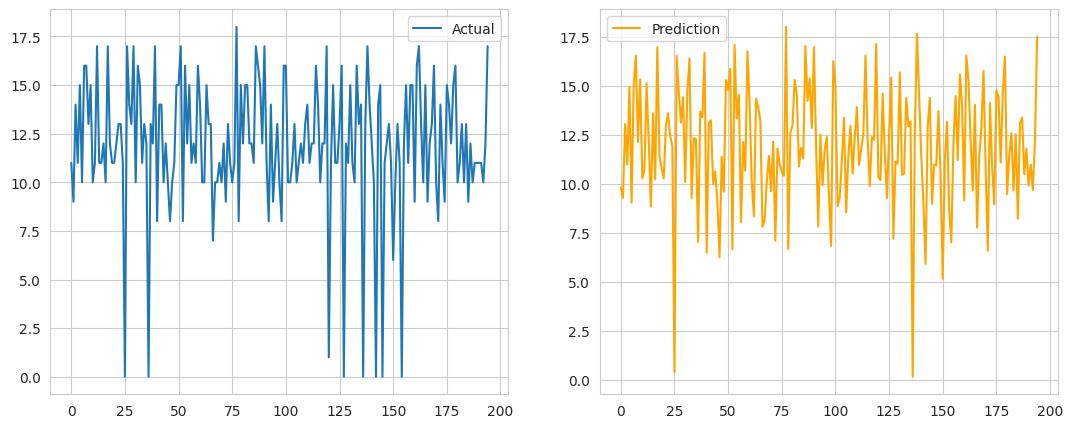

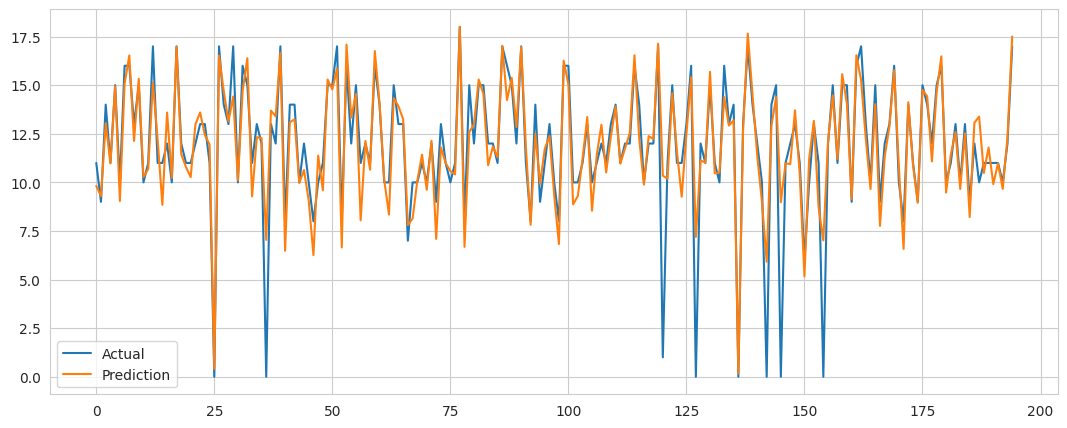

In [ ]:
evaluate(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'])

Coefficients:  [ 3.02894066e-02  4.51917619e-02 -7.22401805e-02  3.98448892e-02
  8.84228689e-02 -1.77963750e-03 -1.46379943e-01 -5.90107099e-02
  6.24856044e-02 -5.15683195e-02 -2.71305733e-02  4.35207776e-02
 -6.50466422e-02  4.20056708e-02  9.20479079e-02 -5.48667191e-02
  4.17113402e-01  2.50420011e+00]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.8781920686061028
Root mean squared error: 1.5960854634364023
R2-score: 0.7860191787188341


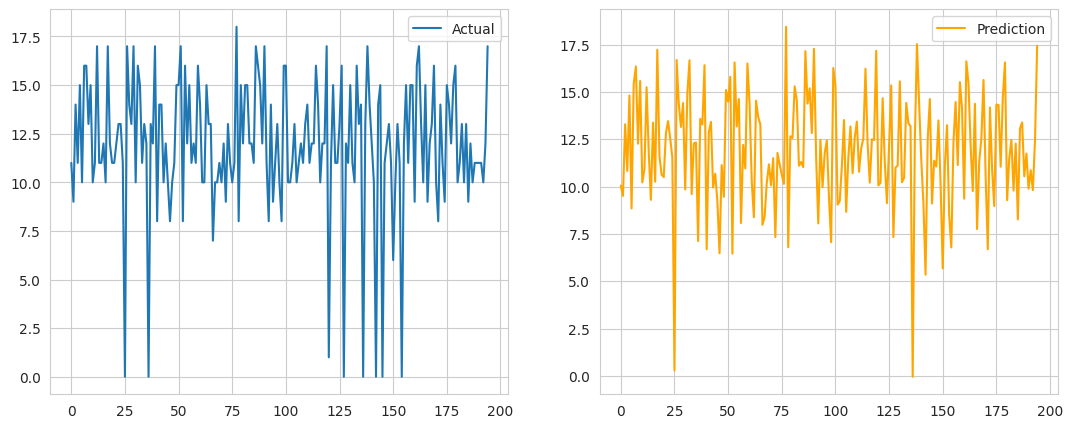

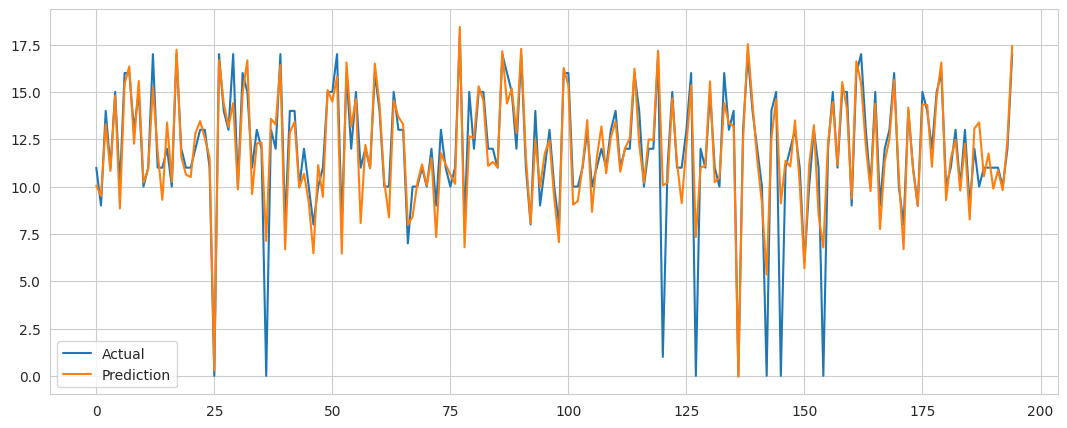

In [ ]:
features = ['Mjob_health','age','freetime','Fjob_teacher','traveltime','sex','reason_other','Mjob_teacher',
'internet','address','reason_reputation','Fedu','Medu','studytime','higher',
'failures','G1','G2']
evaluate(features)

Coefficients:  [-0.11272528  0.04549468  0.07861398 -0.03618397  0.38505793  2.5198437 ]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.8808295832423656
Root mean squared error: 1.6022042435617203
R2-score: 0.784375392960695


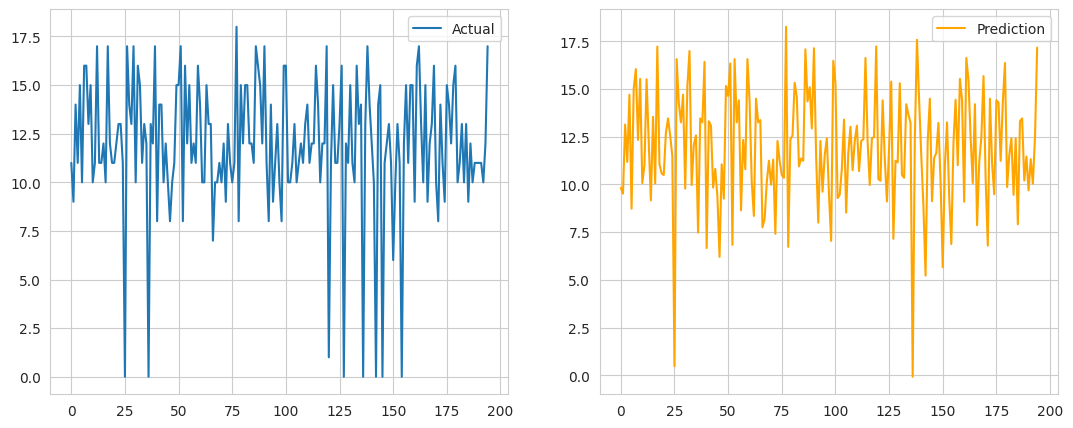

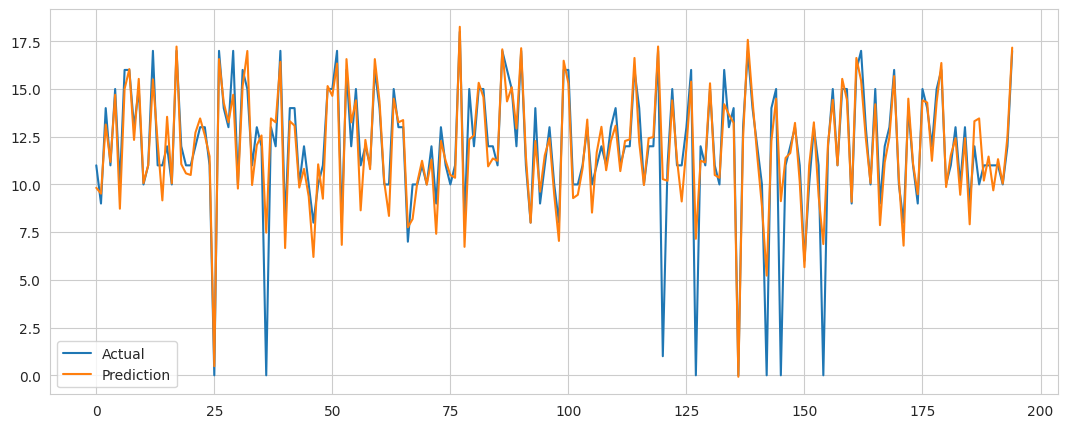

In [ ]:
features = ['school','studytime','higher','failures','G1','G2']
evaluate(features)

Coefficients:  [0.44233208 2.55130969]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.8799028064316715
Root mean squared error: 1.6085637809157411
R2-score: 0.7826602630631997


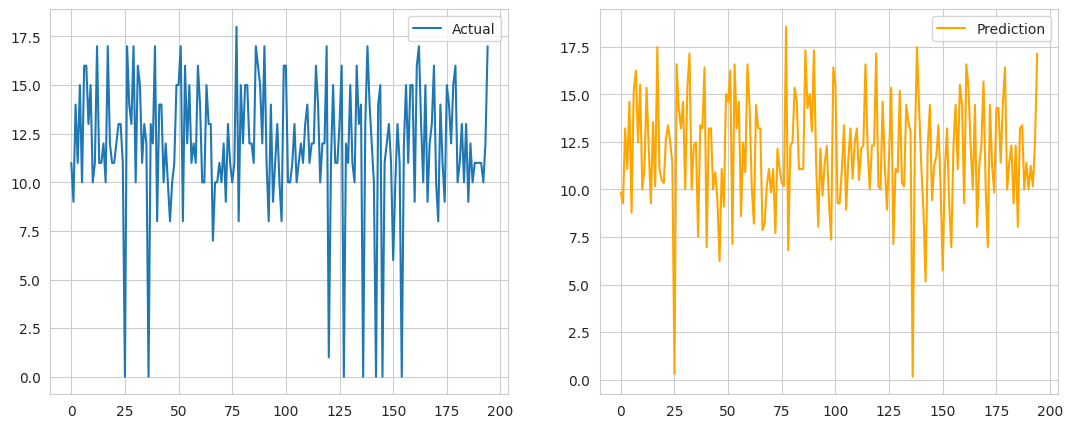

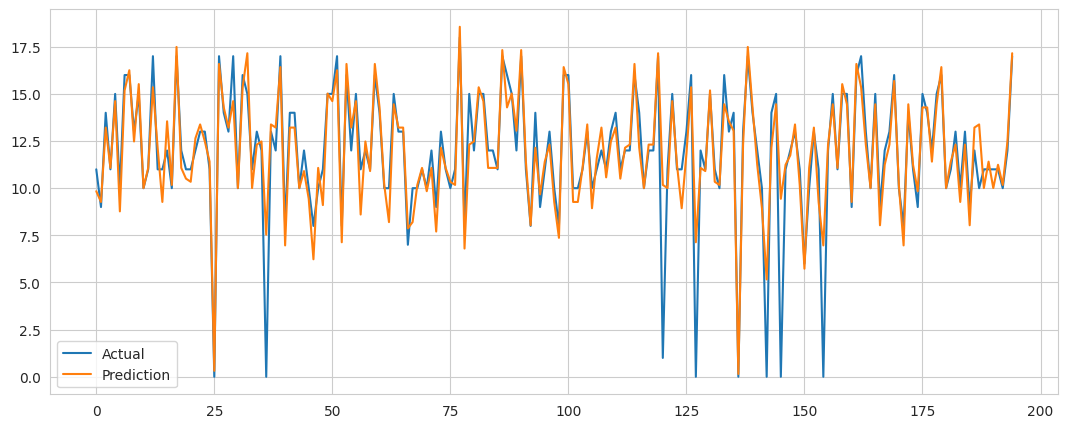

In [ ]:
features = ['G1','G2']
evaluate(features)

In [ ]:
target = 'G3'
x_train, x_test, y_train, y_test = train_test_split(df[['G1','G2']], df[target], test_size=0.3, random_state=0)
scaler = StandardScaler()
x_train = scaler.fit_transform(np.asanyarray(x_train))
y_train = np.asanyarray(y_train)
x_test2 = scaler.fit_transform(np.asanyarray(x_test))
y_test = np.asanyarray(y_test)
model = linear_model.LinearRegression()
model = model.fit(x_train, y_train)
y_test_pred = model.predict(x_test2)

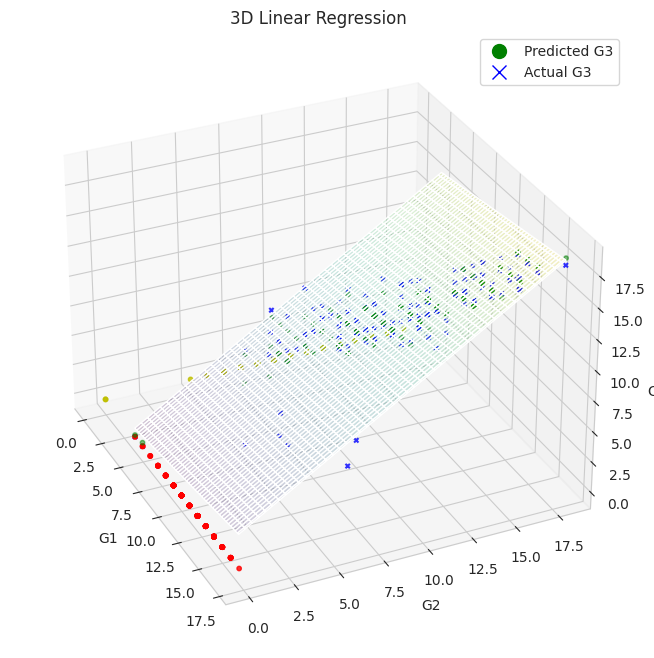

In [ ]:
g1 = x_test['G1'].values
g2 = x_test['G2'].values
g3_pred = y_test_pred
g3 = y_test
# Create grid over which to evaluate model
g1_range = np.linspace(g1.min(), g1.max(), len(g1))
g2_range = np.linspace(g2.min(), g2.max(), len(g2))
g3_range = np.linspace(g3.min(), g3.max(), len(g3))
g1_grid, g2_grid = np.meshgrid(g1_range, g2_range)
g3_pred_grid = 0.15905445 * g1_grid + 0.86613988 * g2_grid + 0.10166617398058975

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plotting
scatter_a = ax.scatter(g1, np.zeros_like(g1), color='r', marker='o', alpha=0.8, s=10)
scatter_b = ax.scatter(np.zeros_like(g2), g2, color='y', marker='o', alpha=0.8, s=10)
scatter_pred = ax.scatter(g1, g2, g3_pred, color='g', marker='o', alpha=0.5, s=10)
scatter_actual = ax.scatter(g1, g2, g3, color='b', marker='x', alpha=0.8, s=10)

# Regression Plane
ax.plot_surface(g1_grid, g2_grid, g3_pred_grid, alpha=0.2, cmap='viridis', shade=True)

ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
ax.set_title('3D Linear Regression')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], linestyle='none', marker='o', color='g', label='Predicted G3', markersize=10),
                   Line2D([0], [0], linestyle='none', marker='x', color='b', label='Actual G3', markersize=10)]
ax.legend(handles=legend_elements)

ax.view_init(elev=30, azim=-25)

plt.show()

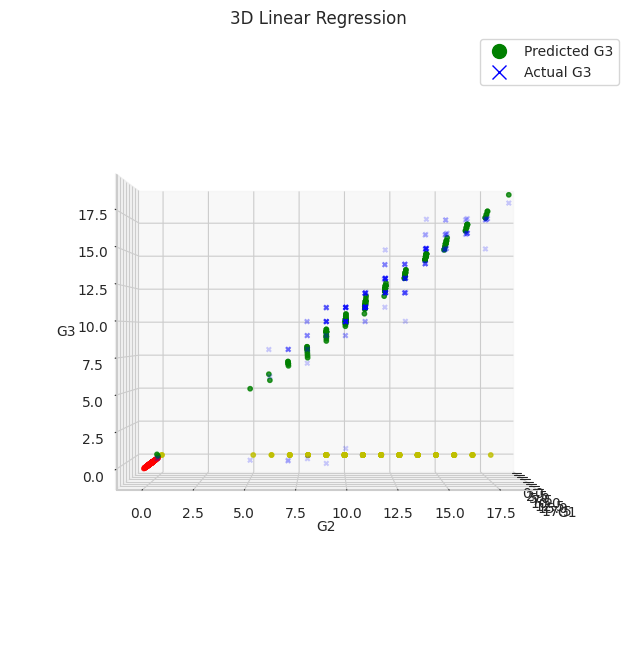

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plotting
scatter_a = ax.scatter(g1, np.zeros_like(g1), color='r', marker='o', alpha=0.8, s=10)
scatter_b = ax.scatter(np.zeros_like(g2), g2, color='y', marker='o', alpha=0.8, s=10)
scatter_pred = ax.scatter(g1, g2, g3_pred, color='g', marker='o', alpha=0.8, s=10)
scatter_actual = ax.scatter(g1, g2, g3, color='b', marker='x', alpha=0.2, s=10)

# Regression Plane
#ax.plot_surface(g1_grid, g2_grid, g3_pred_grid, alpha=0.2, cmap='viridis', shade=True)

ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
ax.set_title('3D Linear Regression')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], linestyle='none', marker='o', color='g', label='Predicted G3', markersize=10),
                   Line2D([0], [0], linestyle='none', marker='x', color='b', label='Actual G3', markersize=10)]
ax.legend(handles=legend_elements)

ax.view_init(elev=0, azim=-0)

plt.show()

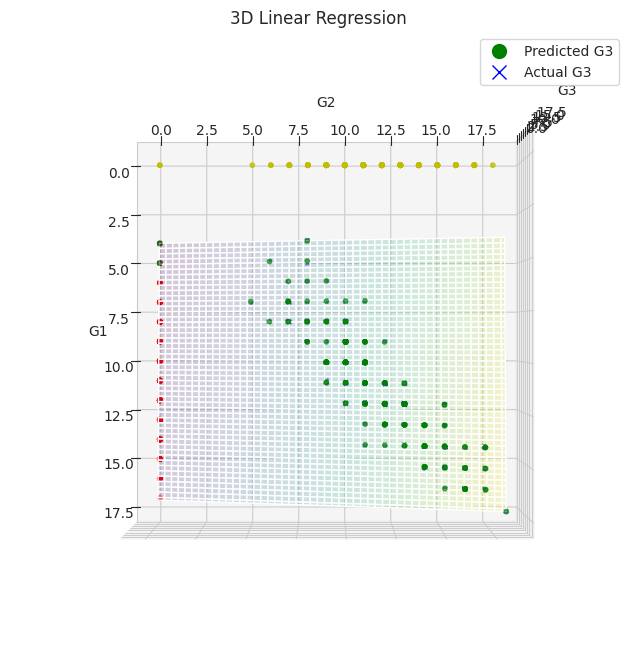

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plotting
scatter_a = ax.scatter(g1, np.zeros_like(g1), color='r', marker='o', alpha=0.8, s=10)
scatter_b = ax.scatter(np.zeros_like(g2), g2, color='y', marker='o', alpha=0.8, s=10)
scatter_pred = ax.scatter(g1, g2, g3_pred, color='g', marker='o', alpha=0.6, s=10)
scatter_actual = ax.scatter(g1, g2, g3, color='b', marker='x', alpha=0.5, s=10)

# Regression Plane
ax.plot_surface(g1_grid, g2_grid, g3_pred_grid, alpha=0.2, cmap='viridis', shade=True)

ax.set_xlabel('G1')
ax.set_ylabel('G2')
ax.set_zlabel('G3')
ax.set_title('3D Linear Regression')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], linestyle='none', marker='o', color='g', label='Predicted G3', markersize=10),
                   Line2D([0], [0], linestyle='none', marker='x', color='b', label='Actual G3', markersize=10)]
ax.legend(handles=legend_elements)

ax.view_init(elev=90, azim=0)

plt.show()

Coefficients:  [-0.59699372 -0.28126415  0.25101717 -0.05754533 -0.14605337 -0.01972903
  0.05045896  0.11462921  0.04646074  0.30403537 -0.73504951 -0.53890627
 -0.08385055 -0.00367503  0.09194185 -0.09915074  0.55357251  0.22560486
 -0.18246344  0.18026699 -0.18944021 -0.19966495  0.07300833 -0.18499202
 -0.23388327 -0.33764715  0.29125426  0.05992926  0.12451994  0.19697564
 -0.06155344 -0.03320234 -0.21394574  0.36329948  0.06296873 -0.18219337
  0.15881315 -0.29684773 -0.16314514]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.2518653269292345
Root mean squared error: 3.01710861938687
R2-score: 0.23538210716393726


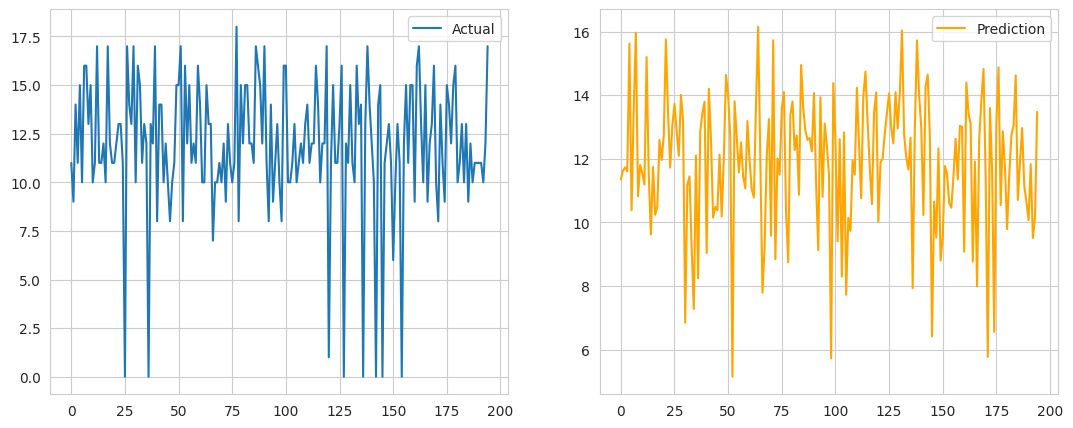

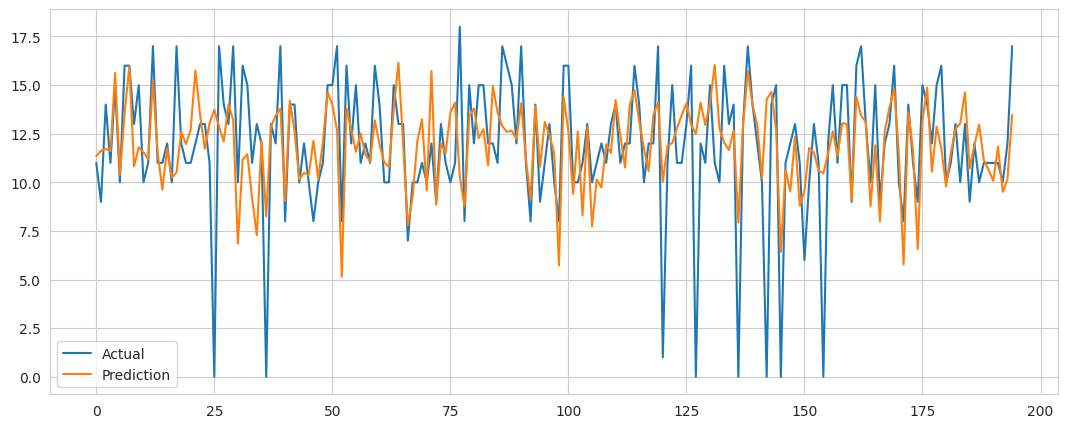

In [ ]:
evaluate(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other'])

Coefficients:  [ 0.25495322  0.21143555 -0.25280108  0.37934031  0.01378437 -0.19762092
 -0.29121207  0.13951436  0.28638229 -0.2097219   0.22844945 -0.00291878
  0.1771905   0.38240011  0.58336196 -0.85927215]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.234295046047113
Root mean squared error: 2.9641698907254717
R2-score: 0.26197895068721977


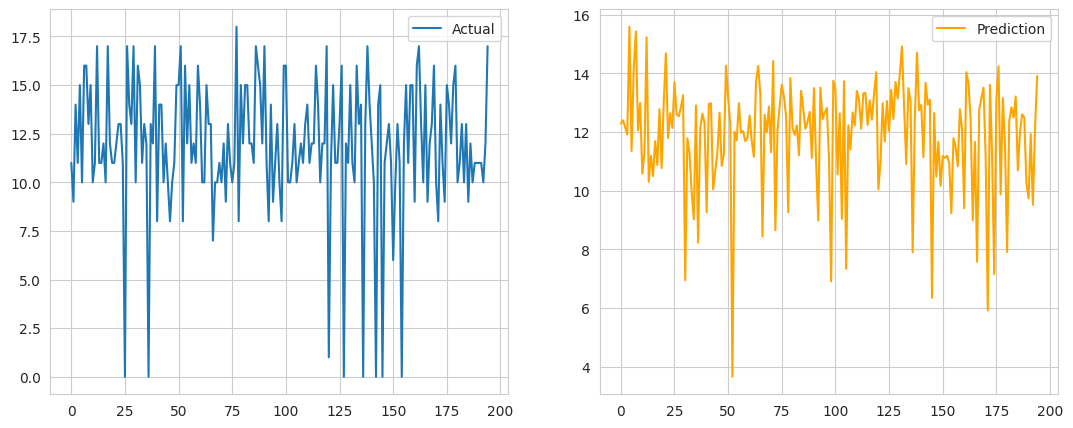

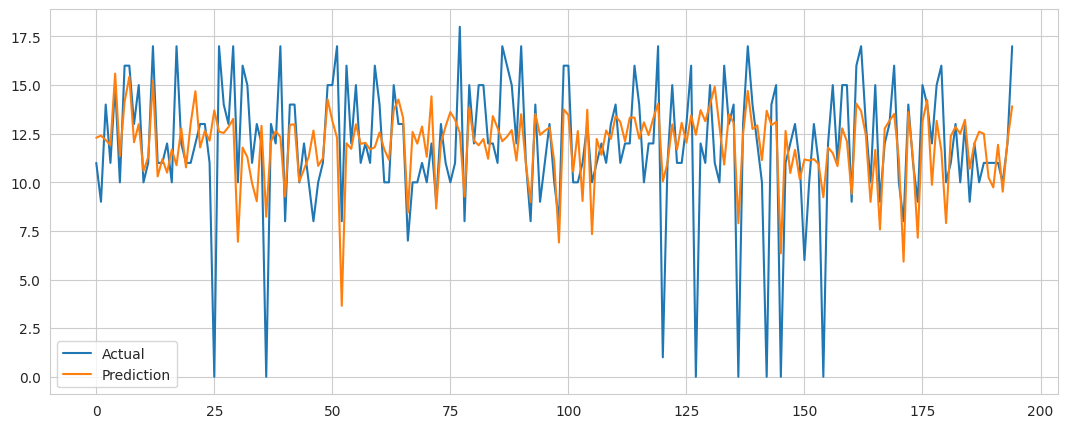

In [ ]:
evaluate(['Mjob_health','age','freetime','Fjob_teacher','traveltime','sex','reason_other','Mjob_teacher',
'internet','address','reason_reputation','Fedu','Medu','studytime','higher',
'failures'])

Coefficients:  [ 0.3015329   0.51705366  0.64188363 -0.91267111]
Intercept:  11.90308370044053
R2-score-cross-validation: 0.19981214024412744
Root mean squared error: 2.98313541474042
R2-score: 0.2525046394835607


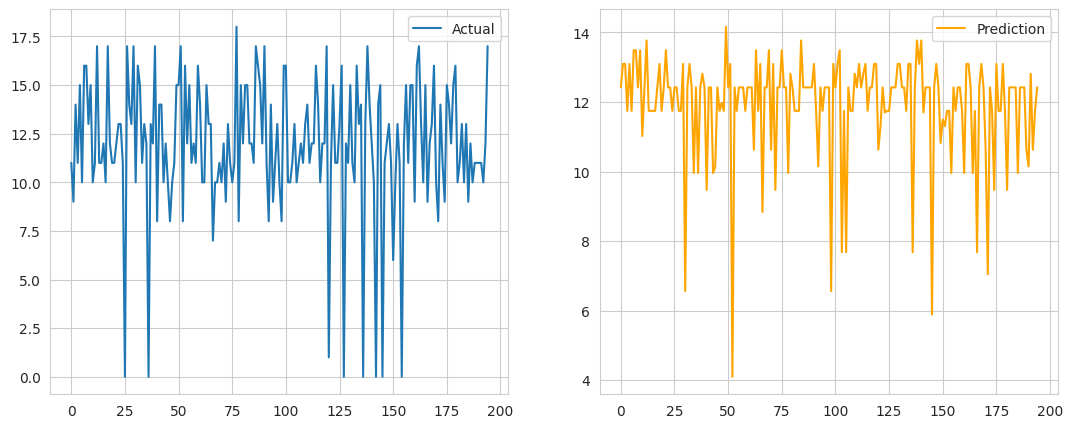

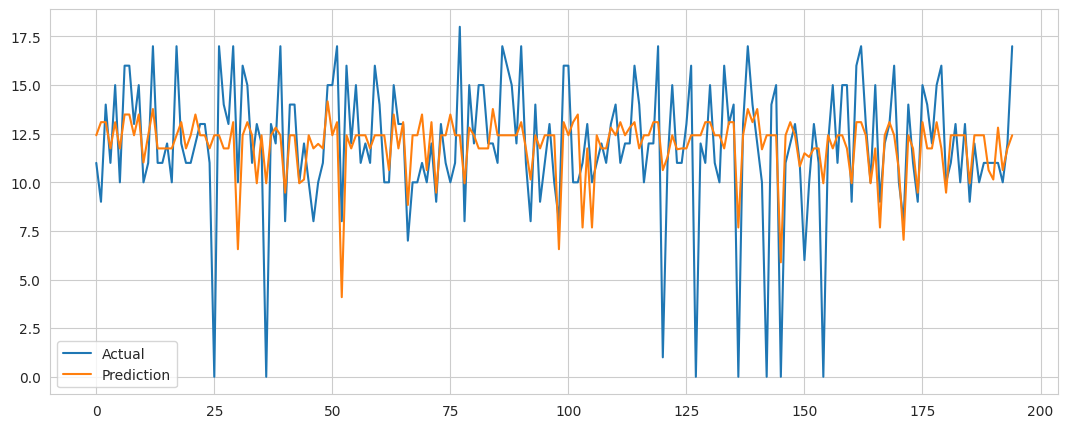

In [ ]:
evaluate(['Mjob_health','studytime','higher','failures'])

## Lazy Predict

In [ ]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
features = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
X_train, X_test, y_train, y_test = train_test_split(
        df[features], df[target], test_size=0.3, random_state=0
    )
models,pred = reg.fit(X_train, X_test, y_train, y_test)

 21%|██▏       | 9/42 [00:00<00:02, 11.59it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 79%|███████▊  | 33/42 [00:02<00:00, 10.78it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:03<00:00, 11.73it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 454, number of used features: 40
[LightGBM] [Info] Start training from score 11.903084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.74       0.79  1.56        0.32
ExtraTreesRegressor                          0.73       0.79  1.59        0.30
GradientBoostingRegressor                    0.73       0.79  1.60        0.18
XGBRegressor                                 0.72       0.78  1.61        0.13
LGBMRegressor                                0.72       0.78  1.61        0.13
HistGradientBoostingRegressor                0.72       0.78  1.62        0.22
AdaBoostRegressor                            0.72       0.78  1.63        0.10
OrthogonalMatchingPursuitCV                  0.72       0.78  1.63        0.02
OrthogonalMatchingPursuit                    0.72       0.78  1.63        0.01
LassoLarsIC                                  0.72       0.78  1.63        0.03
LassoLarsCV                                  0.72       0.78  1.63        0.08
LarsCV                                       0.72       0.78  1.63        0.05
LassoCV                                      0.72       0.78  1.63        0.15
HuberRegressor                               0.71       0.77  1.64        0.03
Lars                                         0.71       0.77  1.64        0.02
SGDRegressor                                 0.71       0.77  1.65        0.02
LinearRegression                             0.71       0.77  1.65        0.02
TransformedTargetRegressor                   0.71       0.77  1.65        0.01
Ridge                                        0.71       0.77  1.65        0.01
RidgeCV                                      0.71       0.77  1.65        0.02
ElasticNetCV                                 0.71       0.77  1.65        0.14
BayesianRidge                                0.71       0.77  1.65        0.02
LinearSVR                                    0.70       0.77  1.67        0.04
ExtraTreeRegressor                           0.70       0.76  1.69        0.03
BaggingRegressor                             0.68       0.75  1.72        0.04
PoissonRegressor                             0.66       0.74  1.77        0.33
RANSACRegressor                              0.66       0.73  1.79        0.19
PassiveAggressiveRegressor                   0.65       0.72  1.81        0.01
DecisionTreeRegressor                        0.64       0.72  1.84        0.02
Lasso                                        0.57       0.66  2.01        0.02
LassoLars                                    0.57       0.66  2.01        0.03
TweedieRegressor                             0.56       0.65  2.03        0.07
MLPRegressor                                 0.55       0.65  2.05        0.44
ElasticNet                                   0.55       0.64  2.06        0.03
SVR                                          0.54       0.64  2.08        0.05
NuSVR                                        0.53       0.63  2.10        0.04
KNeighborsRegressor                          0.34       0.48  2.48        0.11
DummyRegressor                              -0.27      -0.00  3.45        0.02
KernelRidge                                -14.14     -10.94 11.92        0.02
GaussianProcessRegressor                   -15.37     -11.91 12.40        0.03

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

features = ['Mjob_health','age','freetime','Fjob_teacher','traveltime','sex','reason_other','Mjob_teacher',
'internet','address','reason_reputation','Fedu','Medu','studytime','higher',
'failures','G1','G2']

X = df[features]
y = df['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.9199999999999999
Mean Squared Error: 2.695921025641026
R^2 Score: 0.7735513523424108


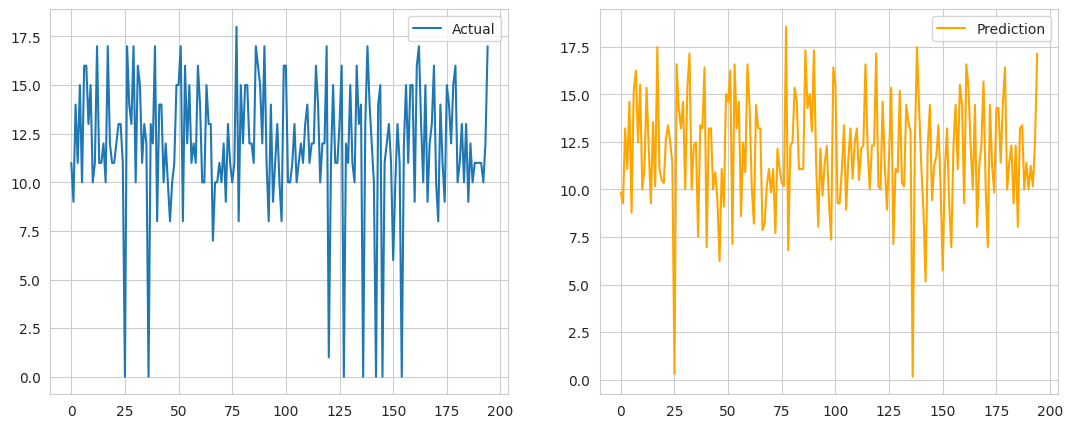

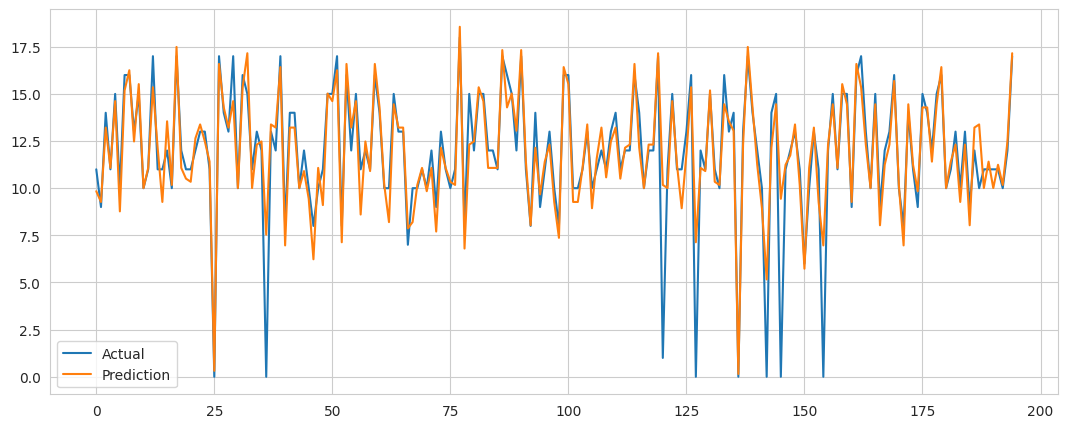

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, color='orange', label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_pred)), y_test_pred, label='Prediction')

ax3.legend()

In [ ]:
bins = [0, 9.5, 11.5, 13.5, 15.5, 20]
labels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']

categorized_predictions = pd.cut(y_test, bins=bins, labels=labels, right=False)
y_test_ev = pd.Series(categorized_predictions)

categorized_predictions = pd.cut(y_pred, bins=bins, labels=labels, right=False)
prediction_series = pd.Series(categorized_predictions)

y_test_ev = y_test_ev.reset_index(drop=True)

# Create a DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_ev,
    'Predicted_Category': prediction_series
})

results_df

Actual Predicted_Category
0      sufficient         sufficient
1            fail         sufficient
2            good       satisfactory
3      sufficient       satisfactory
4            good               good
..            ...                ...
190    sufficient         sufficient
191    sufficient       satisfactory
192    sufficient         sufficient
193  satisfactory       satisfactory
194     excellent          excellent

[195 rows x 2 columns]

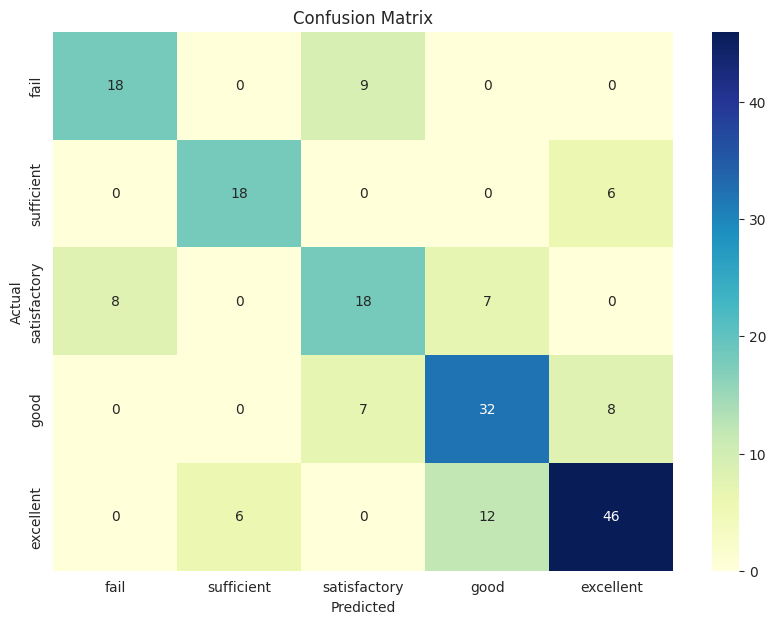

Classification Report:
               precision    recall  f1-score   support

        fail       0.69      0.67      0.68        27
  sufficient       0.75      0.75      0.75        24
satisfactory       0.53      0.55      0.54        33
        good       0.63      0.68      0.65        47
   excellent       0.77      0.72      0.74        64

    accuracy                           0.68       195
   macro avg       0.67      0.67      0.67       195
weighted avg       0.68      0.68      0.68       195

Accuracy: 0.676923076923077


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test_ev, prediction_series)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test_ev, prediction_series, target_names=labels))

print("Accuracy:", accuracy_score(y_test_ev, prediction_series))

#
https://www.kaggle.com/datasets/larsen0966/student-performance-data-set?datasetId=573975&sortBy=voteCount
https://www.kaggle.com/code/archit9406/student-performance-analysis
https://www.kaggle.com/code/sharonyaroshetsky/annual-grades-average-5-level-classification
https://www.kaggle.com/code/akashsdas/predict-students-grades
https://medium.com/omics-diary/how-to-use-the-lazy-predict-library-to-select-the-best-machine-learning-model-65378bf4568e

In [ ]:
features = ['school','studytime','higher','failures','G1','G2']
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
X_train, X_test, y_train, y_test = train_test_split(
        df[features], df[target], test_size=0.3, random_state=0
    )
models,pred = reg.fit(X_train, X_test, y_train, y_test)

 29%|██▊       | 12/42 [00:00<00:01, 25.28it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 81%|████████  | 34/42 [00:01<00:00, 22.76it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:01<00:00, 26.35it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 48
[LightGBM] [Info] Number of data points in the train set: 454, number of used features: 6
[LightGBM] [Info] Start training from score 11.903084
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [ ]:
models

Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LinearRegression                             0.77       0.78  1.62        0.01
TransformedTargetRegressor                   0.77       0.78  1.62        0.01
LassoLarsCV                                  0.77       0.78  1.62        0.01
LassoLarsIC                                  0.77       0.78  1.62        0.01
LarsCV                                       0.77       0.78  1.62        0.06
Lars                                         0.77       0.78  1.62        0.02
RidgeCV                                      0.77       0.78  1.62        0.01
LassoCV                                      0.77       0.78  1.62        0.05
Ridge                                        0.77       0.78  1.62        0.01
BayesianRidge                                0.77       0.78  1.62        0.01
ElasticNetCV                                 0.77       0.78  1.62        0.05
OrthogonalMatchingPursuitCV                  0.77       0.78  1.62        0.01
SGDRegressor                                 0.77       0.78  1.62        0.01
OrthogonalMatchingPursuit                    0.77       0.78  1.63        0.01
HuberRegressor                               0.77       0.78  1.63        0.01
LinearSVR                                    0.76       0.77  1.65        0.01
BaggingRegressor                             0.76       0.77  1.66        0.03
HistGradientBoostingRegressor                0.76       0.77  1.67        0.16
RandomForestRegressor                        0.76       0.77  1.67        0.14
AdaBoostRegressor                            0.76       0.76  1.68        0.03
LGBMRegressor                                0.76       0.76  1.68        0.05
DecisionTreeRegressor                        0.76       0.76  1.68        0.01
RANSACRegressor                              0.75       0.76  1.68        0.02
ExtraTreesRegressor                          0.75       0.76  1.70        0.11
GradientBoostingRegressor                    0.75       0.76  1.70        0.13
PoissonRegressor                             0.73       0.74  1.75        0.02
XGBRegressor                                 0.73       0.74  1.76        0.04
KNeighborsRegressor                          0.72       0.72  1.81        0.01
MLPRegressor                                 0.69       0.70  1.89        0.32
ExtraTreeRegressor                           0.69       0.69  1.91        0.01
NuSVR                                        0.68       0.69  1.92        0.04
SVR                                          0.68       0.69  1.92        0.02
Lasso                                        0.65       0.66  2.01        0.02
LassoLars                                    0.65       0.66  2.01        0.01
TweedieRegressor                             0.64       0.66  2.02        0.01
ElasticNet                                   0.63       0.64  2.06        0.01
PassiveAggressiveRegressor                   0.54       0.55  2.31        0.01
DummyRegressor                              -0.03      -0.00  3.45        0.01
GaussianProcessRegressor                    -1.70      -1.61  5.58        0.03
KernelRidge                                -11.30     -10.92 11.91        0.03

## Deep

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

features = ['Mjob_health','age','freetime','Fjob_teacher','traveltime','sex','reason_other','Mjob_teacher',
'internet','address','reason_reputation','Fedu','Medu','studytime','higher',
'failures','G1','G2']

features = ['school','studytime','higher','failures','G1','G2']

X = data[features]
y = data['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # No activation for regression

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.05))

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=250, batch_size=32, verbose=1)
y_pred = model.predict(X_test)

Epoch 1/250
10/10 [==============================] - 1s 14ms/step - loss: 157.7751 - val_loss: 150.2482
Epoch 2/250
10/10 [==============================] - 0s 6ms/step - loss: 152.2423 - val_loss: 145.1594
Epoch 3/250
10/10 [==============================] - 0s 6ms/step - loss: 146.0606 - val_loss: 140.1059
Epoch 4/250
10/10 [==============================] - 0s 5ms/step - loss: 141.5571 - val_loss: 134.8448
Epoch 5/250
10/10 [==============================] - 0s 6ms/step - loss: 135.4698 - val_loss: 129.0293
Epoch 6/250
10/10 [==============================] - 0s 5ms/step - loss: 130.3769 - val_loss: 122.7312
Epoch 7/250
10/10 [==============================] - 0s 4ms/step - loss: 122.3786 - val_loss: 115.6855
Epoch 8/250
10/10 [==============================] - 0s 7ms/step - loss: 115.9647 - val_loss: 108.0857
Epoch 9/250
10/10 [==============================] - 0s 4ms/step - loss: 108.4707 - val_loss: 99.8189
Epoch 10/250
10/10 [==============================] - 0s 5ms/step - loss:

In [ ]:
mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on Test Set: {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Value: {r2:.4f}")

Mean Squared Error on Test Set: 1.8281
R^2 Value: 0.8138


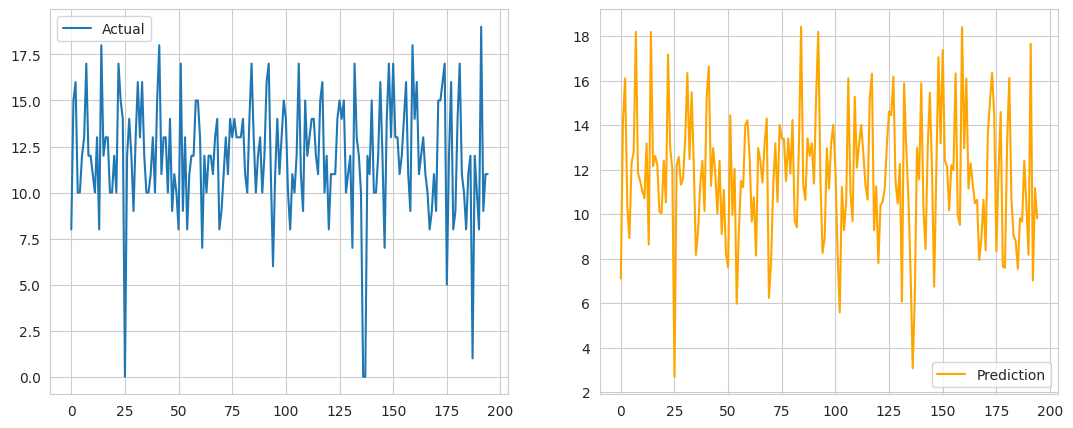

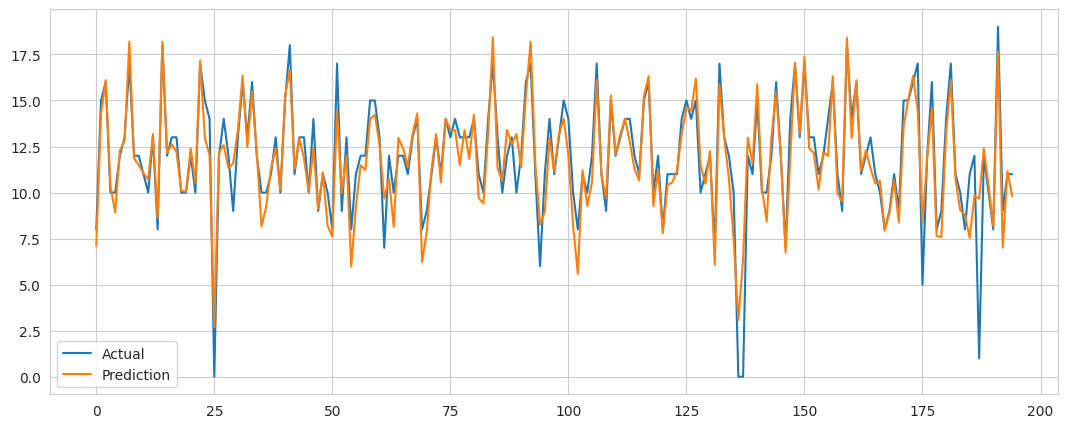

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_pred)), y_pred, color='orange', label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_pred)), y_pred, label='Prediction')

ax3.legend()

In [ ]:
bins = [0, 9.5, 11.5, 13.5, 15.5, 20]
labels = ['fail', 'sufficient', 'satisfactory', 'good', 'excellent']

categorized_predictions = pd.cut(y_test, bins=bins, labels=labels, right=False)
y_test_ev = pd.Series(categorized_predictions)


y_pred_normal = [y[0] for y in y_pred]
categorized_predictions = pd.cut(y_pred_normal, bins=bins, labels=labels, right=False)
prediction_series = pd.Series(categorized_predictions)

y_test_ev = y_test_ev.reset_index(drop=True)

# Create a DataFrame
results_df = pd.DataFrame({
    'Actual': y_test_ev,
    'Predicted_Category': prediction_series
})

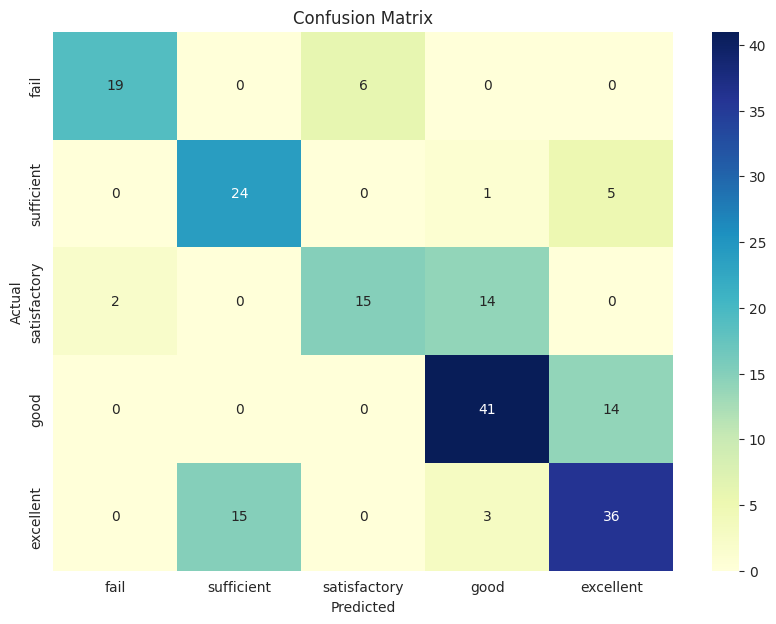

Classification Report:
               precision    recall  f1-score   support

        fail       0.90      0.76      0.83        25
  sufficient       0.62      0.80      0.70        30
satisfactory       0.71      0.48      0.58        31
        good       0.69      0.75      0.72        55
   excellent       0.65      0.67      0.66        54

    accuracy                           0.69       195
   macro avg       0.72      0.69      0.70       195
weighted avg       0.70      0.69      0.69       195

Accuracy: 0.6923076923076923


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

cm = confusion_matrix(y_test_ev, prediction_series)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test_ev, prediction_series, target_names=labels))

print("Accuracy:", accuracy_score(y_test_ev, prediction_series))